## RSI

In [2]:
import websocket, json, pprint, numpy
from binance.client import Client
from binance.enums import *
import pandas as pd
import threading
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rc('figure', max_open_warning = 0)
import ta
import numpy as np
import time
from datetime import date



In [3]:
client =Client("GHmtDwiLp3e3zE35eUTYFPE1hByKqaPnuXdZFHX3GH5CVNsqjsGuerByjyfzCuCP","gBcMvq8dyVaQew7kR3JMd00azlrniZOgZQAKO8otFyjhjtw4hUalKUy7i64x7bKF")

In [4]:
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 34)

In [5]:
def getminutedatal (symbol):
        frame = pd.DataFrame(client.get_historical_klines(symbol,'3m','600 min ago UTC'))
        frame =frame[[0,4]]

        frame.columns=["Time", "Close"  ]
        frame.set_index("Time",inplace=True)
        frame.index = pd.to_datetime(frame.index, unit='ms')


        frame.Close=frame.astype(float)

        return frame

In [6]:
df=getminutedatal("ETHBUSD")
df

Close
Time                        
2023-02-20 00:09:00  1683.00
2023-02-20 00:12:00  1683.75
2023-02-20 00:15:00  1683.25
2023-02-20 00:18:00  1681.74
2023-02-20 00:21:00  1683.20
...                      ...
2023-02-20 09:54:00  1715.39
2023-02-20 09:57:00  1712.12
2023-02-20 10:00:00  1709.68
2023-02-20 10:03:00  1714.16
2023-02-20 10:06:00  1713.71

[200 rows x 1 columns]

In [7]:


import pandas as pd
import numpy as np

def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")
    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """

    delta = ohlc["Close"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

In [8]:
rsi_tradingview(df)

array([   nan, 100.  ,  58.21,  24.67,  52.92,  46.95,  31.7 ,  44.41,
        53.3 ,  39.96,  45.04,  36.64,  36.37,  33.13,  26.85,  39.01,
        34.68,  33.31,  35.  ,  27.25,  22.65,  10.1 ,  14.12,  23.88,
        26.21,  24.2 ,  29.09,  38.28,  39.46,  41.16,  44.89,  47.87,
        48.61,  55.06,  54.92,  52.58,  50.96,  46.8 ,  45.48,  48.73,
        51.1 ,  59.85,  59.08,  63.58,  59.49,  58.48,  57.52,  60.32,
        54.8 ,  56.07,  55.53,  55.37,  53.56,  57.21,  63.69,  65.27,
        62.72,  63.36,  61.6 ,  61.45,  57.47,  56.56,  55.05,  57.08,
        61.23,  61.83,  67.48,  71.3 ,  71.16,  69.28,  68.82,  69.24,
        68.43,  69.07,  75.39,  63.85,  64.9 ,  62.6 ,  66.96,  65.6 ,
        67.45,  69.5 ,  78.45,  64.57,  65.18,  62.24,  58.75,  57.7 ,
        61.76,  64.07,  61.55,  58.08,  56.23,  60.15,  63.4 ,  65.56,
        59.9 ,  60.31,  61.58,  59.27,  58.34,  56.26,  54.59,  45.29,
        44.96,  47.87,  47.4 ,  48.67,  52.33,  48.6 ,  51.18,  50.01,
      

In [9]:
def applyindicator(df):
    df['SMA200']=df.Close.rolling(200).mean()
    df['SMA20']=df.Close.rolling(20).mean()
    df['Stddev']=df.Close.rolling(20).std()
    df['Upper']=df.SMA20 + 2 * df.Stddev
    df['Lower']=df.SMA20 - 2 * df.Stddev
    df['RSi']=rsi_tradingview(df)

In [10]:

    applyindicator(df)


In [11]:
df

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-20 00:09:00  1683.00        NaN        NaN       NaN          NaN   
2023-02-20 00:12:00  1683.75        NaN        NaN       NaN          NaN   
2023-02-20 00:15:00  1683.25        NaN        NaN       NaN          NaN   
2023-02-20 00:18:00  1681.74        NaN        NaN       NaN          NaN   
2023-02-20 00:21:00  1683.20        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-20 09:54:00  1715.39        NaN  1699.4185  9.014813  1717.448125   
2023-02-20 09:57:00  1712.12        NaN  1700.4185  9.268311  1718.955121   
2023-02-20 10:00:00  1709.68        NaN  1701.3095  9.258794  1719.827087   
2023-02-20 10:03:00  1714.16        NaN  1702.3345  9.498997  1721.332494   
2023-02-20 10:06:00  1713.71  1686.5724  1703.3590  9.568929  1722.496859   

                           Lower     RSi  
Time                                      
2023-02-20 00:09:00          NaN     NaN  
2023-02-20 00:12:00          NaN  100.00  
2023-02-20 00:15:00          NaN   58.21  
2023-02-20 00:18:00          NaN   24.67  
2023-02-20 00:21:00          NaN   52.92  
...                          ...     ...  
2023-02-20 09:54:00  1681.388875   81.25  
2023-02-20 09:57:00  1681.881879   71.26  
2023-02-20 10:00:00  1682.791913   64.86  
2023-02-20 10:03:00  1683.336506   70.16  
2023-02-20 10:06:00  1684.221141   69.03  

[200 rows x 7 columns]

In [12]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i] < 30:
            if signal !=1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif  rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

In [13]:
buy_price, sell_price, rsi_signal = implement_rsi_strategy(df['Close'], df['RSi'])

df["buy_price"]=buy_price
df["Sell_price"]=sell_price
df["Rsi_signal"]=rsi_signal

In [14]:
df

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-20 00:09:00  1683.00        NaN        NaN       NaN          NaN   
2023-02-20 00:12:00  1683.75        NaN        NaN       NaN          NaN   
2023-02-20 00:15:00  1683.25        NaN        NaN       NaN          NaN   
2023-02-20 00:18:00  1681.74        NaN        NaN       NaN          NaN   
2023-02-20 00:21:00  1683.20        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-20 09:54:00  1715.39        NaN  1699.4185  9.014813  1717.448125   
2023-02-20 09:57:00  1712.12        NaN  1700.4185  9.268311  1718.955121   
2023-02-20 10:00:00  1709.68        NaN  1701.3095  9.258794  1719.827087   
2023-02-20 10:03:00  1714.16        NaN  1702.3345  9.498997  1721.332494   
2023-02-20 10:06:00  1713.71  1686.5724  1703.3590  9.568929  1722.496859   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  
Time                                                                         
2023-02-20 00:09:00          NaN     NaN        NaN         NaN           0  
2023-02-20 00:12:00          NaN  100.00        NaN     1683.75          -1  
2023-02-20 00:15:00          NaN   58.21        NaN         NaN           0  
2023-02-20 00:18:00          NaN   24.67    1681.74         NaN           1  
2023-02-20 00:21:00          NaN   52.92        NaN         NaN           0  
...                          ...     ...        ...         ...         ...  
2023-02-20 09:54:00  1681.388875   81.25        NaN         NaN           0  
2023-02-20 09:57:00  1681.881879   71.26        NaN         NaN           0  
2023-02-20 10:00:00  1682.791913   64.86        NaN         NaN           0  
2023-02-20 10:03:00  1683.336506   70.16        NaN         NaN           0  
2023-02-20 10:06:00  1684.221141   69.03        NaN         NaN           0  

[200 rows x 10 columns]

In [15]:
    
    df['buy'] = df['Rsi_signal'].apply(lambda x: 1 if x == 1 else 0)
    df['Sell'] = df['Rsi_signal'].apply(lambda x: 1 if x == -1 else 0)
    df[["RSi","buy_price","Sell_price","Rsi_signal","buy","Sell"]]

RSi  buy_price  Sell_price  Rsi_signal  buy  Sell
Time                                                                     
2023-02-20 00:09:00     NaN        NaN         NaN           0    0     0
2023-02-20 00:12:00  100.00        NaN     1683.75          -1    0     1
2023-02-20 00:15:00   58.21        NaN         NaN           0    0     0
2023-02-20 00:18:00   24.67    1681.74         NaN           1    1     0
2023-02-20 00:21:00   52.92        NaN         NaN           0    0     0
...                     ...        ...         ...         ...  ...   ...
2023-02-20 09:54:00   81.25        NaN         NaN           0    0     0
2023-02-20 09:57:00   71.26        NaN         NaN           0    0     0
2023-02-20 10:00:00   64.86        NaN         NaN           0    0     0
2023-02-20 10:03:00   70.16        NaN         NaN           0    0     0
2023-02-20 10:06:00   69.03        NaN         NaN           0    0     0

[200 rows x 6 columns]

In [16]:
df[["Rsi_signal","buy","Sell"]]

Rsi_signal  buy  Sell
Time                                      
2023-02-20 00:09:00           0    0     0
2023-02-20 00:12:00          -1    0     1
2023-02-20 00:15:00           0    0     0
2023-02-20 00:18:00           1    1     0
2023-02-20 00:21:00           0    0     0
...                         ...  ...   ...
2023-02-20 09:54:00           0    0     0
2023-02-20 09:57:00           0    0     0
2023-02-20 10:00:00           0    0     0
2023-02-20 10:03:00           0    0     0
2023-02-20 10:06:00           0    0     0

[200 rows x 3 columns]

In [17]:
def pricecalc(symbol,limit=0.98):
    rawPrice= float(client.get_symbol_ticker(symbol="ETHBUSD")['price'])
    declen=len(str(rawPrice).split(".")[1])
    price=rawPrice*limit
    return round(price,declen)

In [18]:
def rightrounding(lotsize):
    splitted= str(lotsize).split(".")
    if float(splitted[0])==1:
        return 0
    else:
        return len(splitted[1])

In [19]:
def quantitycalc(symbol,investment):
    info = client.get_symbol_info(symbol=symbol)
    lotsize=float([i for i in info['filters']if i["filterType"]=='LOT_SIZE'][0]['minQty'])
    price=pricecalc(symbol)
    qty=round(investment/price,rightrounding(lotsize))
    return qty

In [20]:
quantitycalc("ETHBUSD",20)

0.0119

In [21]:
# df["buy"].tail(1)=/\1
df.iloc[-1, df.columns.get_loc('buy')] = 1

In [22]:
df[["buy","Sell"]].tail(1)

buy  Sell
Time                          
2023-02-20 10:06:00    1     0

In [23]:

for x,y in df[["buy","Sell"]].tail(1).values:
    if  x==1:
        order=client.create_order(symbol="ETHBUSD",side="BUY",type="MARKET",quantity=quantitycalc("ETHBUSD",20))
        opentrade=True
        print(order)
    elif  y==1:
        order= client.create_order(symbol="ETHBUSD",side="SELL",type="MARKET",quantity=quantitycalc("ETHBUSD",20))
        opentrade=False
        print(order)
    else:
        print("DO Nothing.....")

BinanceAPIException: APIError(code=-2015): Invalid API-key, IP, or permissions for action.

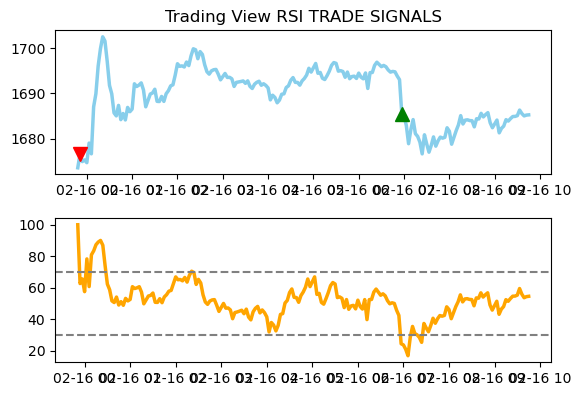

In [44]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5, color = 'skyblue', label = 'DF')
ax1.plot(df.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(df.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('Trading View RSI TRADE SIGNALS')
ax2.plot(df['RSi'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

In [3]:
def trade(symbol):
    def getminutedatal (symbol):
        frame = pd.DataFrame(client.get_historical_klines(symbol,'3m','600 min ago UTC'))
        frame =frame[[0,4]]

        frame.columns=["Time", "Close"  ]
        frame.set_index("Time",inplace=True)
        frame.index = pd.to_datetime(frame.index, unit='ms')


        frame.Close=frame.astype(float)

        return frame
    
    df=getminutedatal(symbol)

    def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
        """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
            The TradingView code is as follows:
            //@version=4
            study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
            len = input(14, minval=1, title="Length")
            src = input(close, "Source", type = input.source)
            up = rma(max(change(src), 0), len)
            down = rma(-min(change(src), 0), len)
            rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
            plot(rsi, "RSI", color=#8E1599)
            band1 = hline(70, "Upper Band", color=#C0C0C0)
            band0 = hline(30, "Lower Band", color=#C0C0C0)
            fill(band1, band0, color=#9915FF, transp=90, title="Background")
        :param ohlc:
        :param period:
        :param round_rsi:
        :return: an array with the RSI indicator values
        """

        delta = ohlc["Close"].diff()

        up = delta.copy()
        up[up < 0] = 0
        up = pd.Series.ewm(up, alpha=1/period).mean()

        down = delta.copy()
        down[down > 0] = 0
        down *= -1
        down = pd.Series.ewm(down, alpha=1/period).mean()

        rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

        return np.round(rsi, 2) if round_rsi else rsi

    rsi_tradingview(df)

    def applyindicator(df):
        df['SMA200']=df.Close.rolling(200).mean()
        df['SMA20']=df.Close.rolling(20).mean()
        df['Stddev']=df.Close.rolling(20).std()
        df['Upper']=df.SMA20 + 2 * df.Stddev
        df['Lower']=df.SMA20 - 2 * df.Stddev
        df['RSi']= rsi_tradingview(df)
        
    applyindicator(df)
    
    def implement_rsi_strategy(prices, rsi):    
        buy_price = []
        sell_price = []
        rsi_signal = []
        csv_file = []
        signal = 0

        for i in range(len(rsi)):
            if rsi[i] < 30:
                if signal !=1:
                    buy_price.append(prices[i])
                    sell_price.append(np.nan)
                    signal = 1
                    rsi_signal.append(signal)
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    rsi_signal.append(0)
            elif  rsi[i] > 70:
                if signal != -1:
                    buy_price.append(np.nan)
                    sell_price.append(prices[i])
                    signal = -1
                    rsi_signal.append(signal)
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    rsi_signal.append(0)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)

        return buy_price, sell_price, rsi_signal

    buy_price, sell_price, rsi_signal = implement_rsi_strategy(df['Close'], df['RSi'])
    df["buy_price"]=buy_price
    df["Sell_price"]=sell_price
    df["Rsi_signal"]=rsi_signal  
    
    df['buy'] = df['Rsi_signal'].apply(lambda x: 1 if x == 1 else 0)
    df['Sell'] = df['Rsi_signal'].apply(lambda x: 1 if x == -1 else 0)
    pd.set_option('display.max_rows', 5)
    pd.set_option('display.max_columns', 34)
    display(df)
    from datetime import date
    today = date.today()
    df.to_csv(f"Dataframe{today}.csv",index=False)
    def pricecalc(symbol,limit=0.98):
        rawPrice= float(client.get_symbol_ticker(symbol="ETHBUSD")['price'])
        declen=len(str(rawPrice).split(".")[1])
        price=rawPrice*limit
        return round(price,declen)
    
    def rightrounding(lotsize):
        splitted= str(lotsize).split(".")
        if float(splitted[0])==1:
            return 0
        else:
            return len(splitted[1])

    
    def quantitycalc(symbol,investment):
        info = client.get_symbol_info(symbol=symbol)
        lotsize=float([i for i in info['filters']if i["filterType"]=='LOT_SIZE'][0]['minQty'])
        price=pricecalc(symbol)
        qty=round(investment/price,rightrounding(lotsize))
        return qty
    global b 
    for x,y in df[["buy","Sell"]].tail(1).values:
        if x==1:
            order=client.create_order(symbol="ETHBUSD",side="BUY",type="MARKET",quantity=quantitycalc("ETHBUSD",80))
#             b=True
            print(order)
            
#             today = date.today()
#             file_path=f"data{today}.csv"
#             with open({file_path},{"a"}.format(filejson, j)) as output_file:
#                 output_file.write(order + "\n")
        elif  y==1:
            order = client.create_order(symbol="ETHBUSD",side="SELL",type="MARKET",quantity=quantitycalc("ETHBUSD",80))
#             opentrade=False
            print(order)
            
#             today = date.today()
#             file_path=f"data{today}.csv"
#             with open({file_path},{"a"}.format(filejson, j)) as output_file:
#                 output_file.write(order + "\n")
        else:
            order="DO Nothing....."
            print(order)
#             from datetime import date
#             today = date.today()
#             file_path=f"data{today}.csv"
#             with open({file_path},{"a"}.format(filejson, j)) as output_file:
#                 output_file.write(order + "\n")
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(df['Close'], linewidth = 2.5, color = 'skyblue', label = 'DF')
    ax1.plot(df.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
    ax1.plot(df.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
    ax1.set_title('Trading View RSI TRADE SIGNALS')
    ax2.plot(df['RSi'], color = 'orange', linewidth = 2.5)
    ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    plt.show()

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:18:00  1664.61        NaN        NaN       NaN          NaN   
2023-02-17 03:21:00  1663.32        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:12:00  1665.18        NaN  1665.7435  1.140357  1668.024213   
2023-02-17 13:15:00  1665.32  1661.5207  1665.6470  1.086555  1667.820109   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:18:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:21:00          NaN   0.00    1663.32         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:12:00  1663.462787  47.89        NaN         NaN           0   
2023-02-17 13:15:00  1663.473891  48.45        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:18:00    0     0  
2023-02-17 03:21:00    1     0  
...                  ...   ...  
2023-02-17 13:12:00    0     0  
2023-02-17 13:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


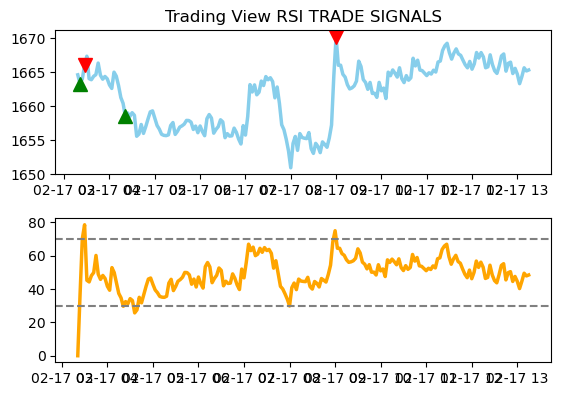

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:21:00  1663.32        NaN        NaN       NaN          NaN   
2023-02-17 03:24:00  1664.01        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:15:00  1665.55        NaN  1665.6585  1.084126  1667.826752   
2023-02-17 13:18:00  1665.56  1661.5266  1665.6540  1.084350  1667.822700   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:21:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:24:00          NaN  100.00        NaN     1664.01          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:15:00  1663.490248   49.33        NaN         NaN           0   
2023-02-17 13:18:00  1663.485300   49.37        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:21:00    0     0  
2023-02-17 03:24:00    0     1  
...                  ...   ...  
2023-02-17 13:15:00    0     0  
2023-02-17 13:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


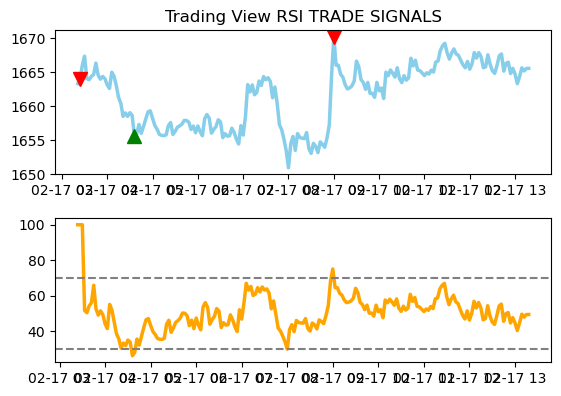

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:24:00  1664.01         NaN       NaN       NaN          NaN   
2023-02-17 03:27:00  1666.00         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 13:18:00  1664.92         NaN  1665.622  1.096644  1667.815287   
2023-02-17 13:21:00  1661.03  1661.51195  1665.384  1.500443  1668.384887   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:24:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:27:00          NaN  100.00        NaN      1666.0          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:18:00  1663.428713   46.95        NaN         NaN           0   
2023-02-17 13:21:00  1662.383113   35.54        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:24:00    0     0  
2023-02-17 03:27:00    0     1  
...                  ...   ...  
2023-02-17 13:18:00    0     0  
2023-02-17 13:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


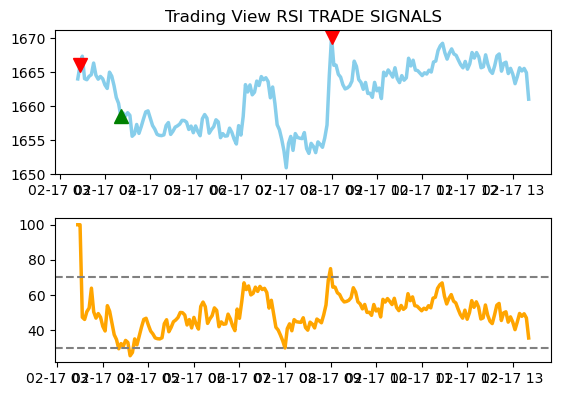

Close    SMA200      SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 03:27:00  1666.00       NaN        NaN       NaN          NaN   
2023-02-17 03:30:00  1667.35       NaN        NaN       NaN          NaN   
...                      ...       ...        ...       ...          ...   
2023-02-17 13:21:00  1659.33       NaN  1665.2990  1.781844  1668.862688   
2023-02-17 13:24:00  1659.92  1661.483  1664.9175  2.068309  1669.054119   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:27:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:30:00          NaN  100.00        NaN     1667.35          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:21:00  1661.735312   32.13        NaN         NaN           0   
2023-02-17 13:24:00  1660.780881   34.48        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:27:00    0     0  
2023-02-17 03:30:00    0     1  
...                  ...   ...  
2023-02-17 13:21:00    0     0  
2023-02-17 13:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


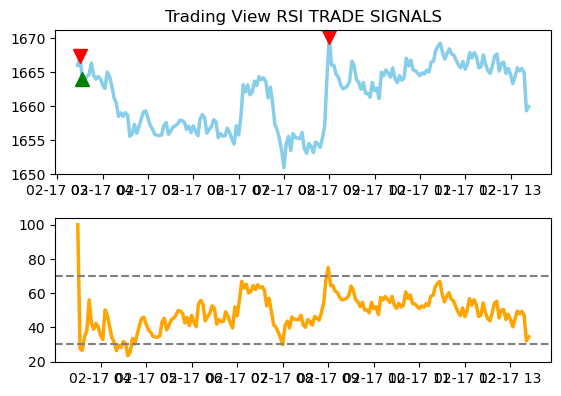

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 03:30:00  1667.35         NaN        NaN       NaN          NaN   
2023-02-17 03:33:00  1664.05         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 13:24:00  1661.94         NaN  1665.0185  1.849134  1668.716769   
2023-02-17 13:27:00  1660.23  1661.46425  1664.7235  2.114119  1668.951737   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:30:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:33:00          NaN   0.00    1664.05         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:24:00  1661.320231  41.43        NaN         NaN           0   
2023-02-17 13:27:00  1660.495263  37.78        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:30:00    0     0  
2023-02-17 03:33:00    1     0  
...                  ...   ...  
2023-02-17 13:24:00    0     0  
2023-02-17 13:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


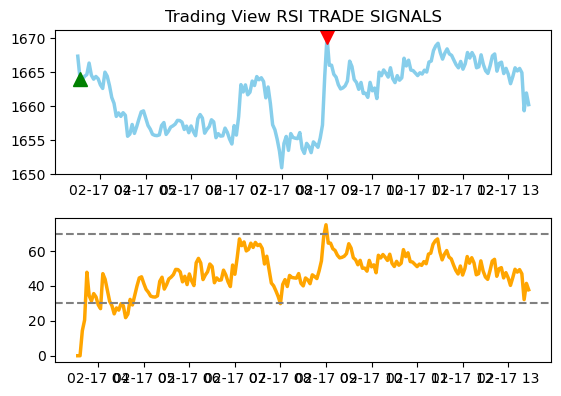

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:33:00  1664.05         NaN       NaN       NaN          NaN   
2023-02-17 03:36:00  1663.89         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 13:27:00  1660.70         NaN  1664.747  2.063549  1668.874097   
2023-02-17 13:30:00  1660.02  1661.42995  1664.488  2.313622  1669.115245   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:33:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:36:00          NaN   0.00    1663.89         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:27:00  1660.619903  38.71        NaN         NaN           0   
2023-02-17 13:30:00  1659.860755  37.27        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:33:00    0     0  
2023-02-17 03:36:00    1     0  
...                  ...   ...  
2023-02-17 13:27:00    0     0  
2023-02-17 13:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


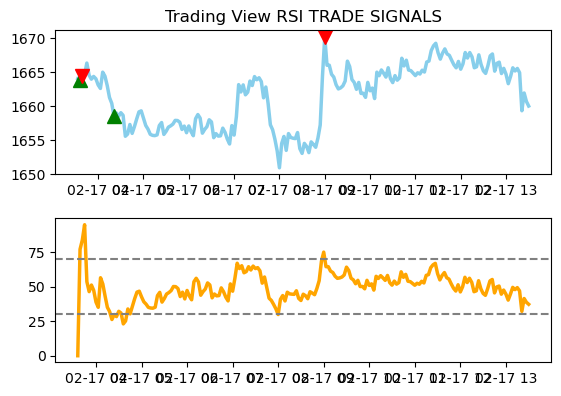

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:36:00  1663.89        NaN        NaN       NaN          NaN   
2023-02-17 03:39:00  1664.39        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:30:00  1661.51        NaN  1664.5625  2.182449  1668.927398   
2023-02-17 13:33:00  1661.09  1661.4226  1664.3760  2.314654  1669.005309   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:36:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:39:00          NaN  100.00        NaN     1664.39          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:30:00  1660.197602   41.41        NaN         NaN           0   
2023-02-17 13:33:00  1659.746691   40.42        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:36:00    0     0  
2023-02-17 03:39:00    0     1  
...                  ...   ...  
2023-02-17 13:30:00    0     0  
2023-02-17 13:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


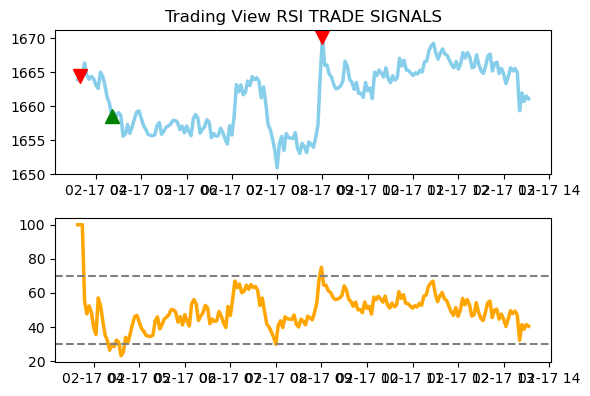

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 03:39:00  1664.39         NaN        NaN       NaN          NaN   
2023-02-17 03:42:00  1664.64         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 13:33:00  1660.98         NaN  1664.3705  2.322989  1669.016478   
2023-02-17 13:36:00  1661.93  1661.41225  1664.1700  2.353251  1668.876502   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:42:00          NaN  100.00        NaN     1664.64          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:33:00  1659.724522   40.17        NaN         NaN           0   
2023-02-17 13:36:00  1659.463498   43.45        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:39:00    0     0  
2023-02-17 03:42:00    0     1  
...                  ...   ...  
2023-02-17 13:33:00    0     0  
2023-02-17 13:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


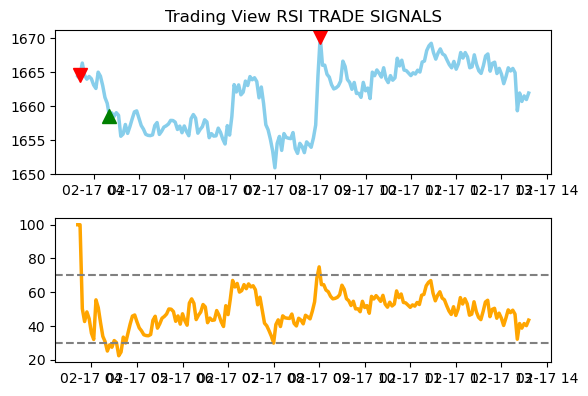

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:42:00  1664.64         NaN       NaN       NaN          NaN   
2023-02-17 03:45:00  1666.34         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 13:36:00  1661.93         NaN  1664.170  2.353251  1668.876502   
2023-02-17 13:39:00  1661.31  1661.39685  1663.866  2.307663  1668.481326   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:42:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:45:00          NaN  100.00        NaN     1666.34          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:36:00  1659.463498   43.45        NaN         NaN           0   
2023-02-17 13:39:00  1659.250674   41.84        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:42:00    0     0  
2023-02-17 03:45:00    0     1  
...                  ...   ...  
2023-02-17 13:36:00    0     0  
2023-02-17 13:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


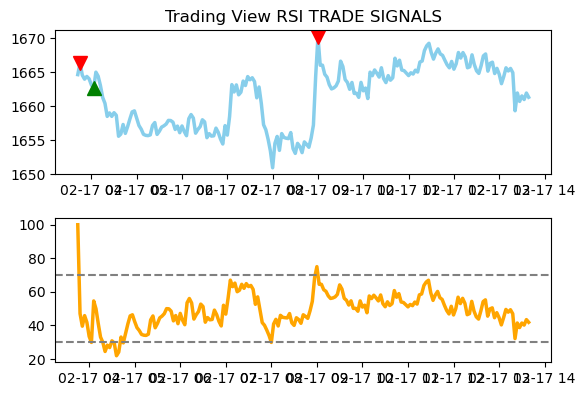

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:45:00  1666.34        NaN        NaN       NaN          NaN   
2023-02-17 03:48:00  1664.56        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:39:00  1661.55        NaN  1663.8780  2.294257  1668.466515   
2023-02-17 13:42:00  1661.51  1661.3824  1663.5695  2.167432  1667.904365   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:45:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:48:00          NaN   0.00    1664.56         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:39:00  1659.289485  42.45        NaN         NaN           0   
2023-02-17 13:42:00  1659.234635  42.34        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:45:00    0     0  
2023-02-17 03:48:00    1     0  
...                  ...   ...  
2023-02-17 13:39:00    0     0  
2023-02-17 13:42:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


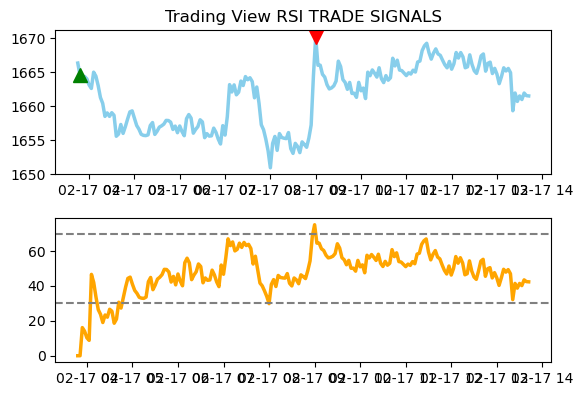

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 03:48:00  1664.56         NaN        NaN       NaN          NaN   
2023-02-17 03:51:00  1663.97         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 13:42:00  1660.59         NaN  1663.5235  2.222505  1667.968510   
2023-02-17 13:45:00  1660.97  1661.35095  1663.3145  2.257762  1667.830024   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:48:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:51:00          NaN   0.00    1663.97         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:42:00  1659.078490  39.94        NaN         NaN           0   
2023-02-17 13:45:00  1658.798976  41.41        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:48:00    0     0  
2023-02-17 03:51:00    1     0  
...                  ...   ...  
2023-02-17 13:42:00    0     0  
2023-02-17 13:45:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


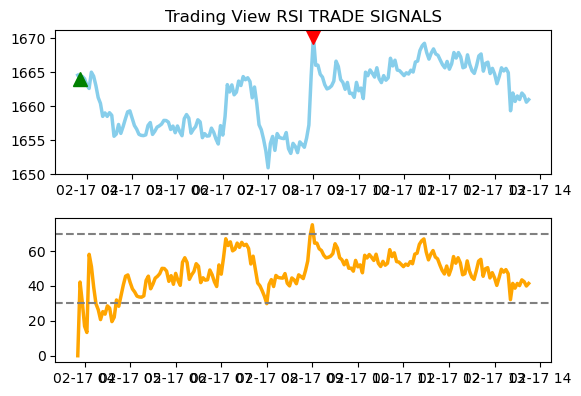

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:51:00  1663.97        NaN        NaN       NaN          NaN   
2023-02-17 03:54:00  1664.37        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:45:00  1662.87        NaN  1663.4095  2.192964  1667.795427   
2023-02-17 13:48:00  1661.57  1661.3455  1663.1730  2.118624  1667.410249   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 03:51:00          NaN     NaN        NaN         NaN           0   
2023-02-17 03:54:00          NaN  100.00        NaN     1664.37          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:45:00  1659.023573   47.83        NaN         NaN           0   
2023-02-17 13:48:00  1658.935751   44.26        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:51:00    0     0  
2023-02-17 03:54:00    0     1  
...                  ...   ...  
2023-02-17 13:45:00    0     0  
2023-02-17 13:48:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


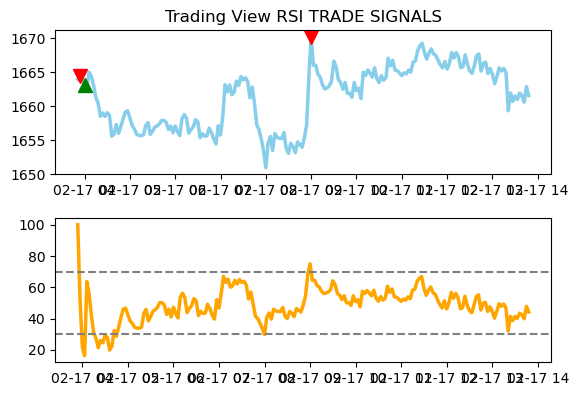

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:54:00  1664.37        NaN        NaN       NaN          NaN   
2023-02-17 03:57:00  1664.03        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:48:00  1661.98        NaN  1663.1935  2.104232  1667.401964   
2023-02-17 13:51:00  1659.40  1661.3247  1662.8400  2.118639  1667.077278   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:54:00          NaN    NaN        NaN         NaN           0   
2023-02-17 03:57:00          NaN   0.00    1664.03         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:48:00  1658.985036  45.33        NaN         NaN           0   
2023-02-17 13:51:00  1658.602722  38.96        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:54:00    0     0  
2023-02-17 03:57:00    1     0  
...                  ...   ...  
2023-02-17 13:48:00    0     0  
2023-02-17 13:51:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


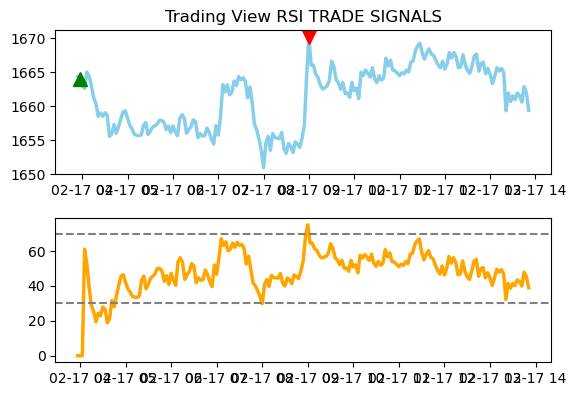

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 03:57:00  1664.03        NaN        NaN       NaN          NaN   
2023-02-17 04:00:00  1663.12        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:51:00  1658.52        NaN  1662.7960  2.201364  1667.198728   
2023-02-17 13:54:00  1660.03  1661.2986  1662.5575  2.231016  1667.019531   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 03:57:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:00:00          NaN   0.00    1663.12         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:51:00  1658.393272  37.18        NaN         NaN           0   
2023-02-17 13:54:00  1658.095469  42.07        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 03:57:00    0     0  
2023-02-17 04:00:00    1     0  
...                  ...   ...  
2023-02-17 13:51:00    0     0  
2023-02-17 13:54:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


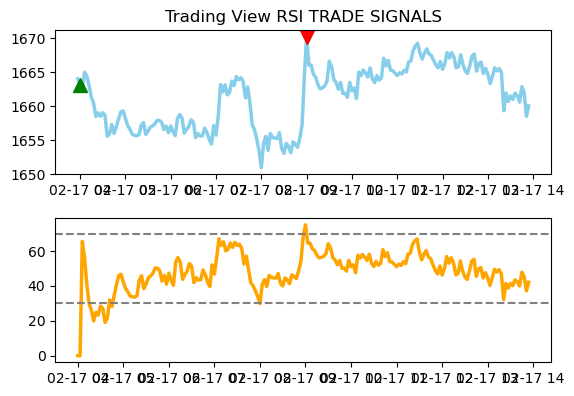

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:00:00  1663.12         NaN        NaN       NaN          NaN   
2023-02-17 04:03:00  1662.61         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 13:54:00  1660.74         NaN  1662.5930  2.194023  1666.981046   
2023-02-17 13:57:00  1661.43  1661.28915  1662.3865  2.092061  1666.570622   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:00:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:03:00          NaN   0.00    1662.61         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 13:54:00  1658.204954  44.12        NaN         NaN           0   
2023-02-17 13:57:00  1658.202378  46.11        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:00:00    0     0  
2023-02-17 04:03:00    1     0  
...                  ...   ...  
2023-02-17 13:54:00    0     0  
2023-02-17 13:57:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


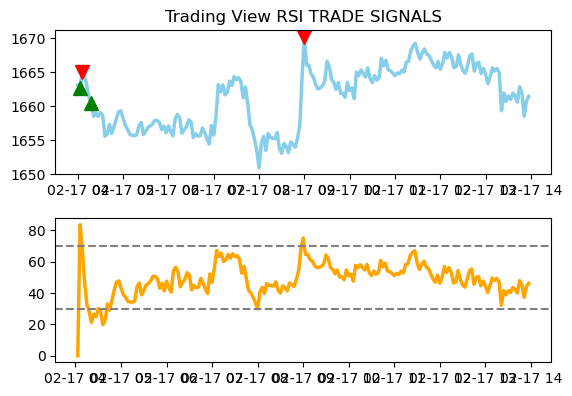

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:03:00  1662.61        NaN        NaN       NaN          NaN   
2023-02-17 04:06:00  1665.00        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 13:57:00  1661.03        NaN  1662.3665  2.103567  1666.573633   
2023-02-17 14:00:00  1661.83  1661.2807  1662.2230  2.032701  1666.288403   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:03:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:06:00          NaN  100.00        NaN      1665.0          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 13:57:00  1658.159367   44.97        NaN         NaN           0   
2023-02-17 14:00:00  1658.157597   47.37        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:03:00    0     0  
2023-02-17 04:06:00    0     1  
...                  ...   ...  
2023-02-17 13:57:00    0     0  
2023-02-17 14:00:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


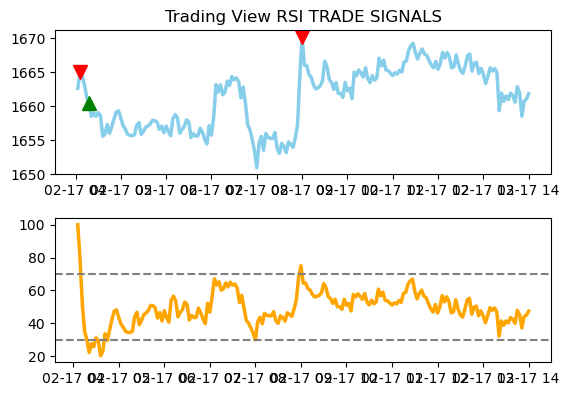

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 04:06:00  1665.00        NaN       NaN       NaN          NaN   
2023-02-17 04:09:00  1664.41        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 14:00:00  1660.99        NaN  1662.181  2.049855  1666.280709   
2023-02-17 14:03:00  1661.37  1661.2703  1662.084  2.039493  1666.162985   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:06:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:09:00          NaN   0.00    1664.41         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:00:00  1658.081291  44.87        NaN         NaN           0   
2023-02-17 14:03:00  1658.005015  46.12        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:06:00    0     0  
2023-02-17 04:09:00    1     0  
...                  ...   ...  
2023-02-17 14:00:00    0     0  
2023-02-17 14:03:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


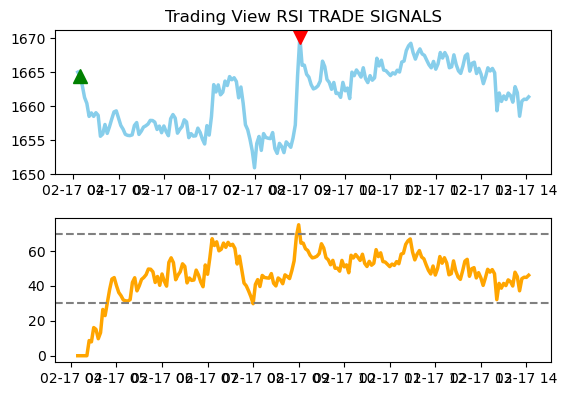

Close      SMA200      SMA20    Stddev       Upper  \
Time                                                                        
2023-02-17 04:09:00  1664.41         NaN        NaN       NaN         NaN   
2023-02-17 04:12:00  1663.03         NaN        NaN       NaN         NaN   
...                      ...         ...        ...       ...         ...   
2023-02-17 14:03:00  1661.87         NaN  1662.1090  2.033335  1666.17567   
2023-02-17 14:06:00  1662.13  1661.25845  1661.9975  1.963340  1665.92418   

                          Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                        
2023-02-17 04:09:00         NaN    NaN        NaN         NaN           0   
2023-02-17 04:12:00         NaN   0.00    1663.03         NaN           1   
...                         ...    ...        ...         ...         ...   
2023-02-17 14:03:00  1658.04233  47.68        NaN         NaN           0   
2023-02-17 14:06:00  1658.07082  48.52        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:09:00    0     0  
2023-02-17 04:12:00    1     0  
...                  ...   ...  
2023-02-17 14:03:00    0     0  
2023-02-17 14:06:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


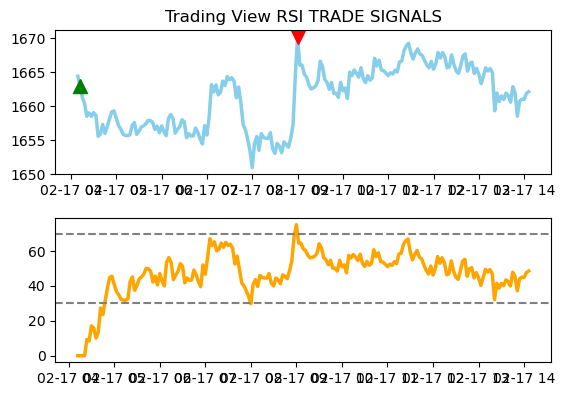

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:12:00  1663.03         NaN        NaN       NaN          NaN   
2023-02-17 04:15:00  1661.28         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:06:00  1663.17         NaN  1662.0495  1.980729  1666.010959   
2023-02-17 14:09:00  1662.31  1661.25315  1661.8830  1.794204  1665.471409   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:12:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:15:00          NaN   0.00    1661.28         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:06:00  1658.088041  51.61        NaN         NaN           0   
2023-02-17 14:09:00  1658.294591  48.99        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:12:00    0     0  
2023-02-17 04:15:00    1     0  
...                  ...   ...  
2023-02-17 14:06:00    0     0  
2023-02-17 14:09:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


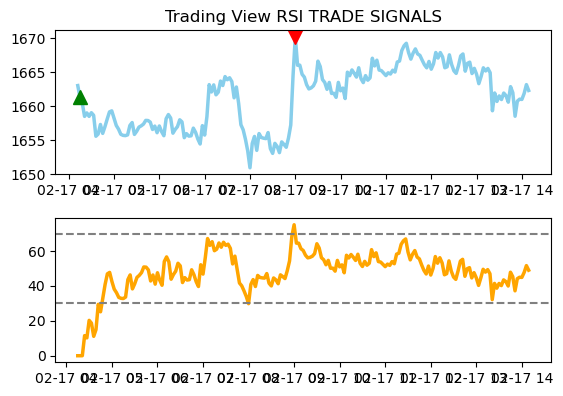

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:15:00  1661.28         NaN        NaN       NaN          NaN   
2023-02-17 04:18:00  1660.42         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:09:00  1662.95         NaN  1661.9150  1.807876  1665.530752   
2023-02-17 14:12:00  1663.29  1661.25765  1661.8205  1.672560  1665.165620   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:15:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:18:00          NaN   0.00    1660.42         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:09:00  1658.299248  50.91        NaN         NaN           0   
2023-02-17 14:12:00  1658.475380  51.99        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:15:00    0     0  
2023-02-17 04:18:00    1     0  
...                  ...   ...  
2023-02-17 14:09:00    0     0  
2023-02-17 14:12:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


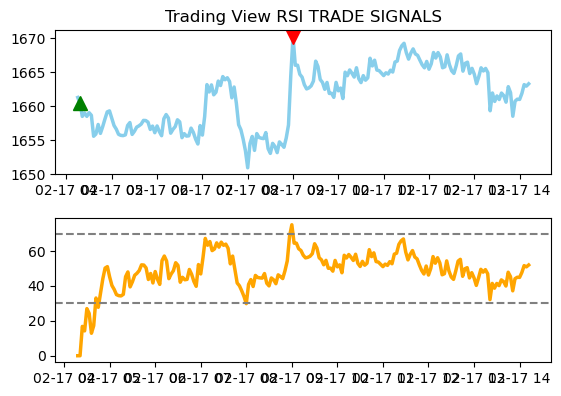

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:18:00  1660.42        NaN        NaN       NaN          NaN   
2023-02-17 04:21:00  1658.50        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:12:00  1665.53        NaN  1661.9325  1.842507  1665.617513   
2023-02-17 14:15:00  1665.25  1661.2887  1661.9175  1.812483  1665.542465   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:18:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:21:00          NaN   0.00     1658.5         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:12:00  1658.247487  58.06        NaN         NaN           0   
2023-02-17 14:15:00  1658.292535  57.09        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:18:00    0     0  
2023-02-17 04:21:00    1     0  
...                  ...   ...  
2023-02-17 14:12:00    0     0  
2023-02-17 14:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


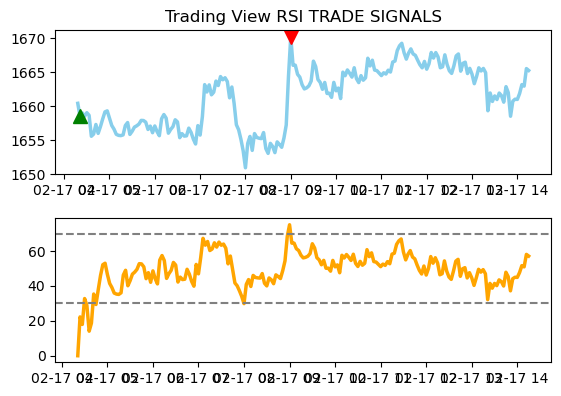

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:21:00  1658.50        NaN        NaN       NaN          NaN   
2023-02-17 04:24:00  1659.01        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:15:00  1666.86        NaN  1661.9980  1.994861  1665.987722   
2023-02-17 14:18:00  1668.85  1661.3389  1662.1945  2.441413  1667.077327   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:21:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:24:00          NaN  100.00        NaN     1659.01          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:15:00  1658.008278   61.20        NaN         NaN           0   
2023-02-17 14:18:00  1657.311673   65.37        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:21:00    0     0  
2023-02-17 04:24:00    0     1  
...                  ...   ...  
2023-02-17 14:15:00    0     0  
2023-02-17 14:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


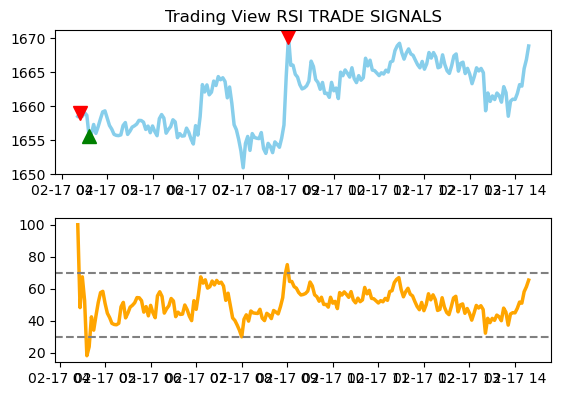

Close    SMA200      SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 04:24:00  1659.01       NaN        NaN       NaN          NaN   
2023-02-17 04:27:00  1658.50       NaN        NaN       NaN          NaN   
...                      ...       ...        ...       ...          ...   
2023-02-17 14:18:00  1669.77       NaN  1662.2405  2.578246  1667.396992   
2023-02-17 14:21:00  1666.20  1661.382  1662.5840  2.627251  1667.838501   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:24:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:27:00          NaN   0.00     1658.5         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:18:00  1657.084008  67.01        NaN         NaN           0   
2023-02-17 14:21:00  1657.329499  55.94        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:24:00    0     0  
2023-02-17 04:27:00    1     0  
...                  ...   ...  
2023-02-17 14:18:00    0     0  
2023-02-17 14:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


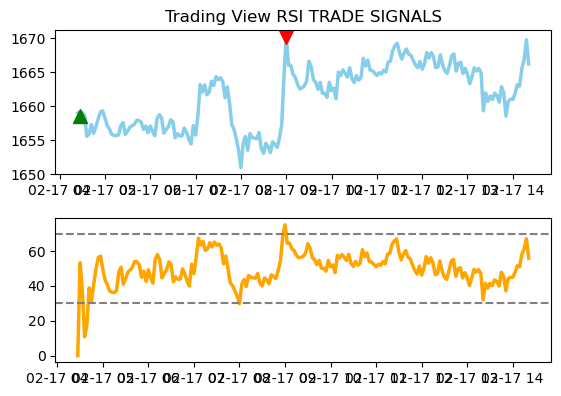

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:27:00  1658.50         NaN       NaN       NaN          NaN   
2023-02-17 04:30:00  1659.04         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 14:21:00  1664.60         NaN  1662.504  2.534055  1667.572110   
2023-02-17 14:24:00  1666.06  1661.40925  1662.710  2.650577  1668.011154   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:27:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:30:00          NaN  100.00        NaN     1659.04          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:21:00  1657.435890   52.08        NaN         NaN           0   
2023-02-17 14:24:00  1657.408846   55.12        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:27:00    0     0  
2023-02-17 04:30:00    0     1  
...                  ...   ...  
2023-02-17 14:21:00    0     0  
2023-02-17 14:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


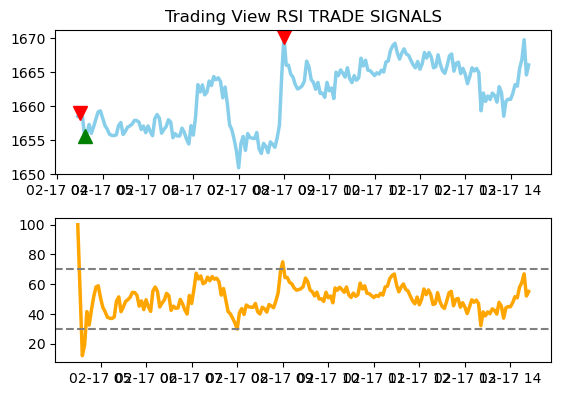

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:30:00  1659.04        NaN        NaN       NaN          NaN   
2023-02-17 04:33:00  1658.66        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:24:00  1668.10        NaN  1662.8120  2.820108  1668.452215   
2023-02-17 14:27:00  1665.85  1661.4562  1663.0695  2.852053  1668.773606   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:30:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:33:00          NaN   0.00    1658.66         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:24:00  1657.171785  58.78        NaN         NaN           0   
2023-02-17 14:27:00  1657.365394  53.59        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:30:00    0     0  
2023-02-17 04:33:00    1     0  
...                  ...   ...  
2023-02-17 14:24:00    0     0  
2023-02-17 14:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


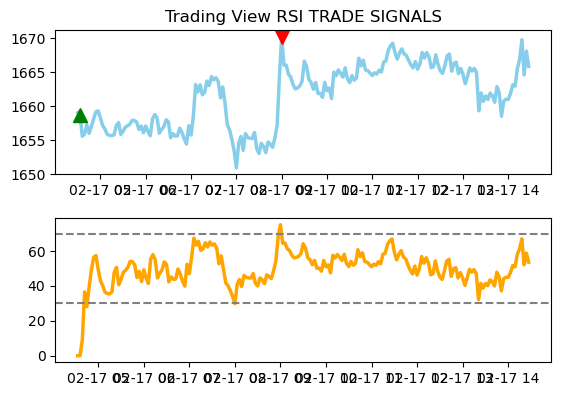

Close     SMA200     SMA20   Stddev        Upper  \
Time                                                                      
2023-02-17 04:33:00  1658.66        NaN       NaN      NaN          NaN   
2023-02-17 04:36:00  1655.58        NaN       NaN      NaN          NaN   
...                      ...        ...       ...      ...          ...   
2023-02-17 14:27:00  1664.98        NaN  1663.026  2.81379  1668.653580   
2023-02-17 14:30:00  1667.09  1661.4921  1663.305  2.92981  1669.164619   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:33:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:36:00          NaN   0.00    1655.58         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:27:00  1657.398420  51.83        NaN         NaN           0   
2023-02-17 14:30:00  1657.445381  55.65        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:33:00    0     0  
2023-02-17 04:36:00    1     0  
...                  ...   ...  
2023-02-17 14:27:00    0     0  
2023-02-17 14:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


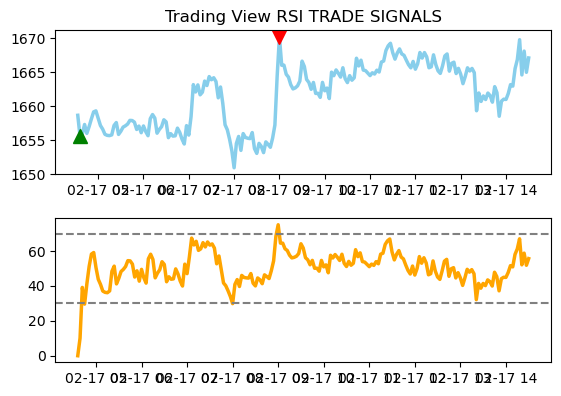

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:36:00  1655.58         NaN        NaN       NaN          NaN   
2023-02-17 04:39:00  1655.90         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:30:00  1668.12         NaN  1663.3565  3.007857  1669.372214   
2023-02-17 14:33:00  1675.44  1661.58115  1664.0795  3.985536  1672.050573   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:36:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:39:00          NaN  100.00        NaN      1655.9          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:30:00  1657.340786   57.30        NaN         NaN           0   
2023-02-17 14:33:00  1656.108427   66.78        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:36:00    0     0  
2023-02-17 04:39:00    0     1  
...                  ...   ...  
2023-02-17 14:30:00    0     0  
2023-02-17 14:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


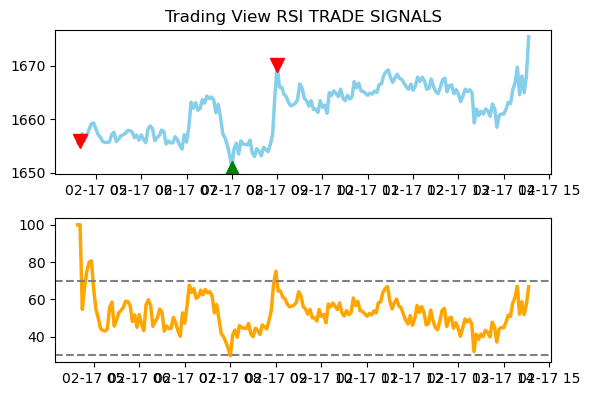

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:39:00  1655.90        NaN        NaN       NaN          NaN   
2023-02-17 04:42:00  1657.31        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:33:00  1679.61        NaN  1664.2880  4.662682  1673.613365   
2023-02-17 14:36:00  1678.10  1661.7146  1665.0965  5.549819  1676.196137   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:42:00          NaN  100.00        NaN     1657.31          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:33:00  1654.962635   70.51        NaN         NaN           0   
2023-02-17 14:36:00  1653.996863   67.55        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:39:00    0     0  
2023-02-17 04:42:00    0     1  
...                  ...   ...  
2023-02-17 14:33:00    0     0  
2023-02-17 14:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


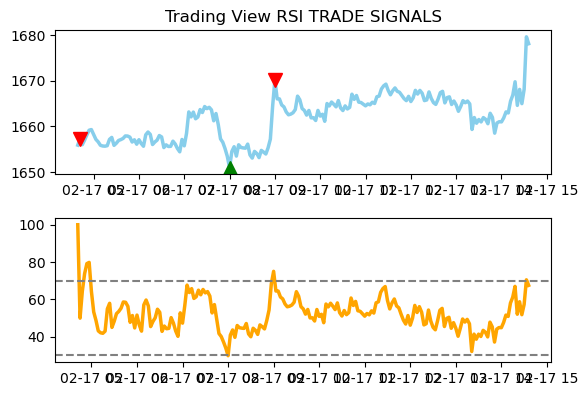

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:42:00  1657.31         NaN        NaN       NaN          NaN   
2023-02-17 04:45:00  1656.00         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:36:00  1681.17         NaN  1665.2500  5.955998  1677.161997   
2023-02-17 14:39:00  1677.26  1661.83675  1666.0355  6.457204  1678.949909   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:42:00          NaN    NaN        NaN         NaN           0   
2023-02-17 04:45:00          NaN   0.00     1656.0         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:36:00  1653.338003  71.78        NaN         NaN           0   
2023-02-17 14:39:00  1653.121091  64.28        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:42:00    0     0  
2023-02-17 04:45:00    1     0  
...                  ...   ...  
2023-02-17 14:36:00    0     0  
2023-02-17 14:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


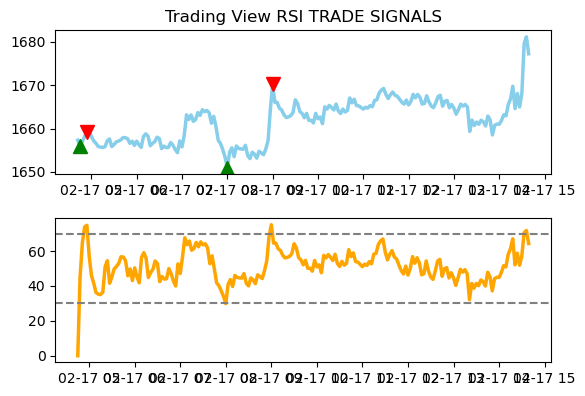

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:45:00  1656.00         NaN        NaN       NaN          NaN   
2023-02-17 04:48:00  1656.99         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:39:00  1676.46         NaN  1665.9955  6.386100  1678.767699   
2023-02-17 14:42:00  1678.17  1661.93705  1666.8745  6.799417  1680.473334   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:45:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:48:00          NaN  100.00        NaN     1656.99          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:39:00  1653.223301   62.93        NaN         NaN           0   
2023-02-17 14:42:00  1653.275666   64.63        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:45:00    0     0  
2023-02-17 04:48:00    0     1  
...                  ...   ...  
2023-02-17 14:39:00    0     0  
2023-02-17 14:42:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


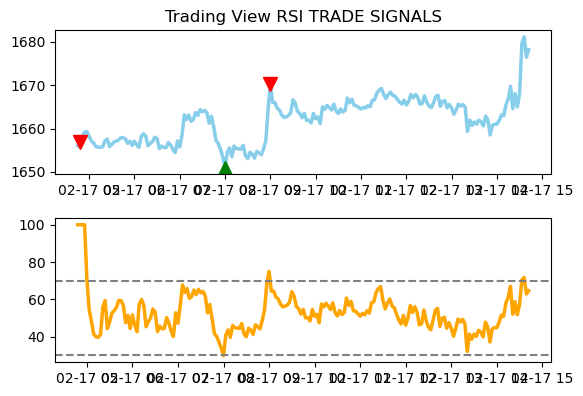

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:48:00  1656.99         NaN        NaN       NaN          NaN   
2023-02-17 04:51:00  1658.12         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:42:00  1679.13         NaN  1666.9225  6.886188  1680.694876   
2023-02-17 14:45:00  1671.10  1662.01735  1667.3340  6.877172  1681.088343   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:48:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:51:00          NaN  100.00        NaN     1658.12          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:42:00  1653.150124   65.52        NaN         NaN           0   
2023-02-17 14:45:00  1653.579657   53.41        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:48:00    0     0  
2023-02-17 04:51:00    0     1  
...                  ...   ...  
2023-02-17 14:42:00    0     0  
2023-02-17 14:45:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


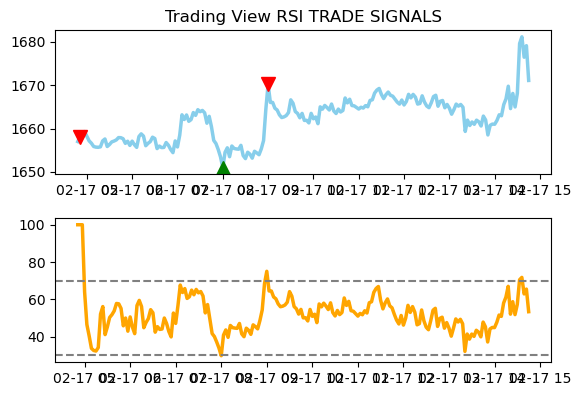

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:51:00  1658.12         NaN        NaN       NaN          NaN   
2023-02-17 04:54:00  1659.16         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:45:00  1661.44         NaN  1666.8510  6.937712  1680.726423   
2023-02-17 14:48:00  1662.17  1661.99495  1666.8605  6.930817  1680.722134   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:51:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:54:00          NaN  100.00        NaN     1659.16          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:45:00  1652.975577   43.70        NaN         NaN           0   
2023-02-17 14:48:00  1652.998866   44.52        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:51:00    0     0  
2023-02-17 04:54:00    0     1  
...                  ...   ...  
2023-02-17 14:45:00    0     0  
2023-02-17 14:48:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


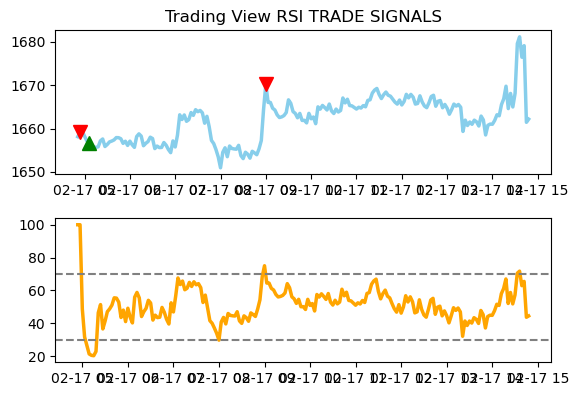

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 04:54:00  1659.16         NaN        NaN       NaN          NaN   
2023-02-17 04:57:00  1659.31         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 14:48:00  1656.54         NaN  1666.5790  7.238840  1681.056681   
2023-02-17 14:51:00  1658.35  1661.96795  1666.5705  7.248894  1681.068289   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 04:54:00          NaN     NaN        NaN         NaN           0   
2023-02-17 04:57:00          NaN  100.00        NaN     1659.31          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 14:48:00  1652.101319   39.75        NaN         NaN           0   
2023-02-17 14:51:00  1652.072711   41.84        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:54:00    0     0  
2023-02-17 04:57:00    0     1  
...                  ...   ...  
2023-02-17 14:48:00    0     0  
2023-02-17 14:51:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


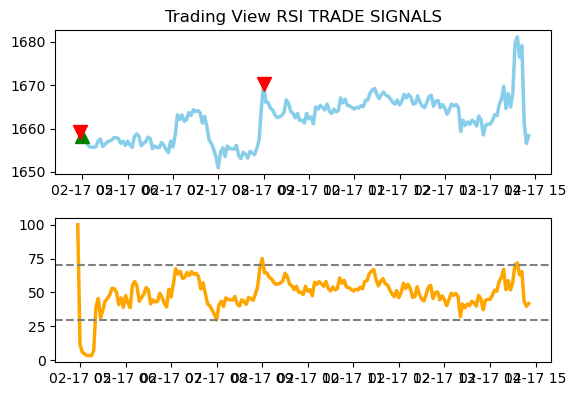

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 04:57:00  1659.31        NaN        NaN       NaN          NaN   
2023-02-17 05:00:00  1658.22        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:51:00  1655.59        NaN  1666.4325  7.437447  1681.307394   
2023-02-17 14:54:00  1650.05  1661.9086  1665.8980  8.211881  1682.321761   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 04:57:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:00:00          NaN   0.00    1658.22         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:51:00  1651.557606  39.01        NaN         NaN           0   
2023-02-17 14:54:00  1649.474239  34.94        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 04:57:00    0     0  
2023-02-17 05:00:00    1     0  
...                  ...   ...  
2023-02-17 14:51:00    0     0  
2023-02-17 14:54:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


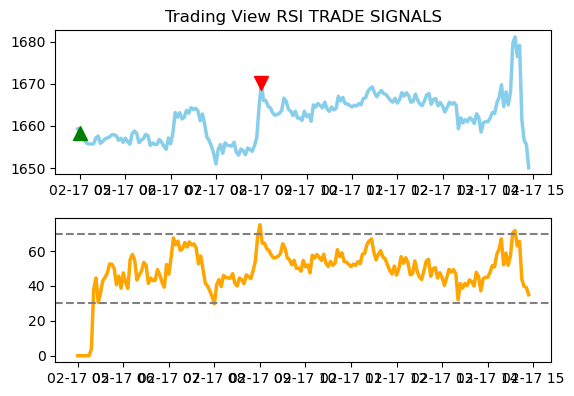

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:00:00  1658.22        NaN        NaN       NaN          NaN   
2023-02-17 05:03:00  1657.16        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:54:00  1656.26        NaN  1666.2085  7.681380  1681.571261   
2023-02-17 14:57:00  1655.14  1661.9188  1665.9140  7.996804  1681.907608   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:00:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:03:00          NaN   0.00    1657.16         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:54:00  1650.845739  39.86        NaN         NaN           0   
2023-02-17 14:57:00  1649.920392  38.88        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:00:00    0     0  
2023-02-17 05:03:00    1     0  
...                  ...   ...  
2023-02-17 14:54:00    0     0  
2023-02-17 14:57:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


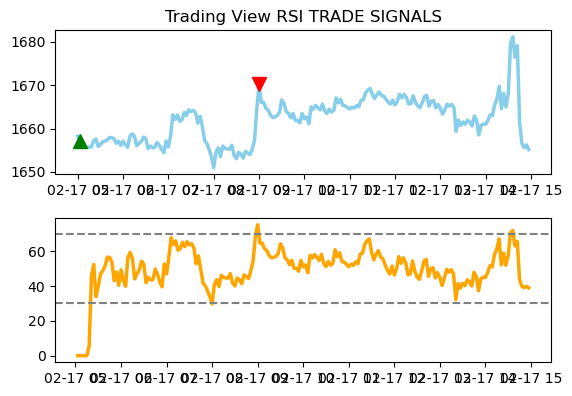

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:03:00  1657.16        NaN        NaN       NaN          NaN   
2023-02-17 05:06:00  1656.62        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 14:57:00  1659.15        NaN  1666.1145  7.759196  1681.632892   
2023-02-17 15:00:00  1662.49  1661.9602  1666.1895  7.714175  1681.617849   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:03:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:06:00          NaN   0.00    1656.62         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 14:57:00  1650.596108  43.50        NaN         NaN           0   
2023-02-17 15:00:00  1650.761151  47.46        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:03:00    0     0  
2023-02-17 05:06:00    1     0  
...                  ...   ...  
2023-02-17 14:57:00    0     0  
2023-02-17 15:00:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


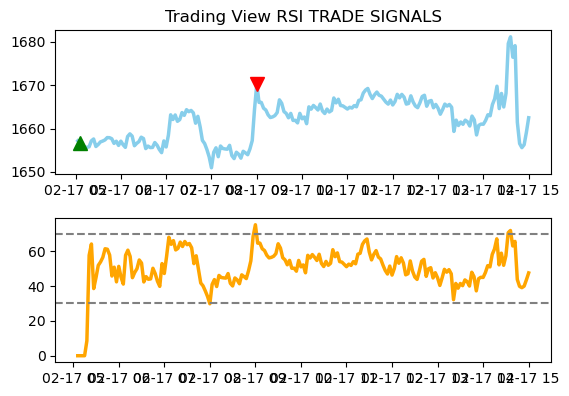

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 05:06:00  1656.62        NaN       NaN       NaN          NaN   
2023-02-17 05:09:00  1655.86        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 15:00:00  1661.30        NaN  1666.130  7.748723  1681.627446   
2023-02-17 15:03:00  1666.85  1662.0027  1666.379  7.684373  1681.747746   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:06:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:09:00          NaN   0.00    1655.86         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:00:00  1650.632554  46.11        NaN         NaN           0   
2023-02-17 15:03:00  1651.010254  52.25        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:06:00    0     0  
2023-02-17 05:09:00    1     0  
...                  ...   ...  
2023-02-17 15:00:00    0     0  
2023-02-17 15:03:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


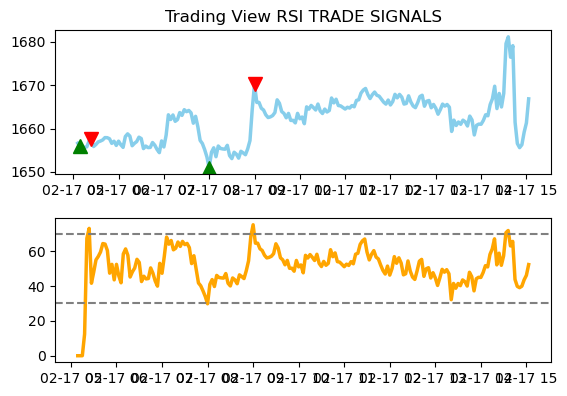

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:09:00  1655.86        NaN        NaN       NaN          NaN   
2023-02-17 05:12:00  1655.71        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 15:03:00  1664.06        NaN  1666.2395  7.700680  1681.640859   
2023-02-17 15:06:00  1665.43  1662.0328  1666.3525  7.669787  1681.692074   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:09:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:12:00          NaN   0.00    1655.71         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:03:00  1650.838141  49.35        NaN         NaN           0   
2023-02-17 15:06:00  1651.012926  50.93        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:09:00    0     0  
2023-02-17 05:12:00    1     0  
...                  ...   ...  
2023-02-17 15:03:00    0     0  
2023-02-17 15:06:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


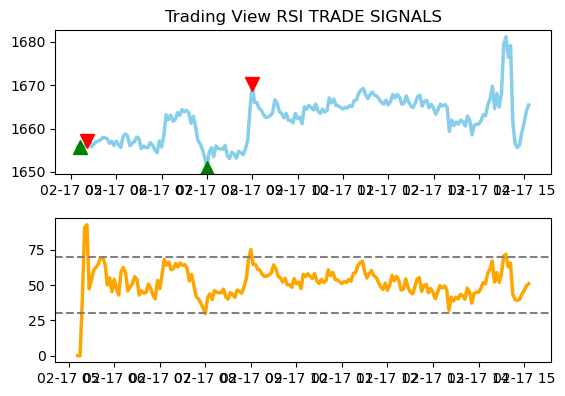

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:12:00  1655.71         NaN        NaN       NaN          NaN   
2023-02-17 05:15:00  1655.67         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:06:00  1662.92         NaN  1666.2270  7.706125  1681.639251   
2023-02-17 15:09:00  1662.62  1662.05405  1666.2105  7.713861  1681.638221   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:12:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:15:00          NaN   0.00    1655.67         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:06:00  1650.814749  48.07        NaN         NaN           0   
2023-02-17 15:09:00  1650.782779  47.71        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:12:00    0     0  
2023-02-17 05:15:00    1     0  
...                  ...   ...  
2023-02-17 15:06:00    0     0  
2023-02-17 15:09:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


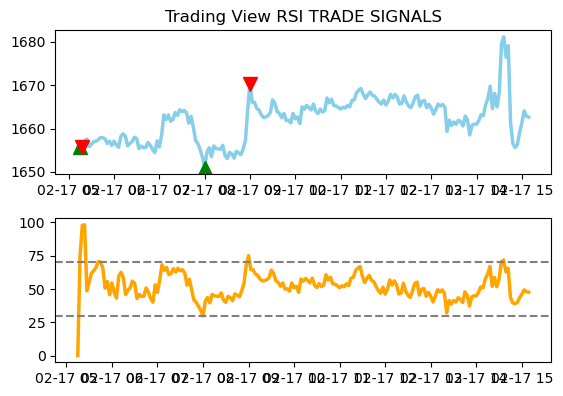

Close      SMA200      SMA20   Stddev        Upper  \
Time                                                                        
2023-02-17 05:15:00  1655.67         NaN        NaN      NaN          NaN   
2023-02-17 05:18:00  1655.78         NaN        NaN      NaN          NaN   
...                      ...         ...        ...      ...          ...   
2023-02-17 15:09:00  1663.70         NaN  1666.2645  7.69115  1681.646799   
2023-02-17 15:12:00  1671.15  1662.13665  1666.5455  7.76521  1682.075920   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:15:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:18:00          NaN  100.00        NaN     1655.78          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:09:00  1650.882201   49.04        NaN         NaN           0   
2023-02-17 15:12:00  1651.015080   57.31        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:15:00    0     0  
2023-02-17 05:18:00    0     1  
...                  ...   ...  
2023-02-17 15:09:00    0     0  
2023-02-17 15:12:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


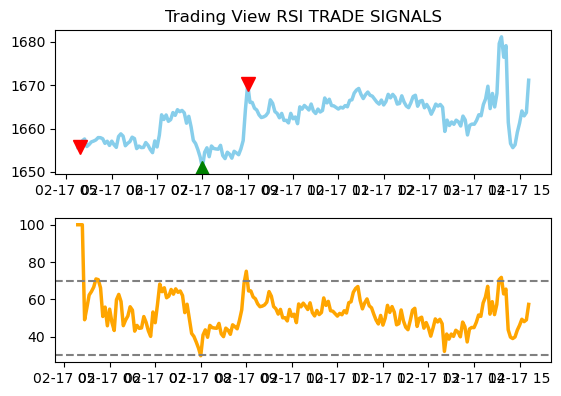

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:18:00  1655.78         NaN        NaN       NaN          NaN   
2023-02-17 05:21:00  1657.16         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:12:00  1667.59         NaN  1666.3675  7.694589  1681.756677   
2023-02-17 15:15:00  1665.59  1662.16845  1666.3040  7.695551  1681.695101   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:18:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:21:00          NaN  100.00        NaN     1657.16          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:12:00  1650.978323   53.72        NaN         NaN           0   
2023-02-17 15:15:00  1650.912899   51.12        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:18:00    0     0  
2023-02-17 05:21:00    0     1  
...                  ...   ...  
2023-02-17 15:12:00    0     0  
2023-02-17 15:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


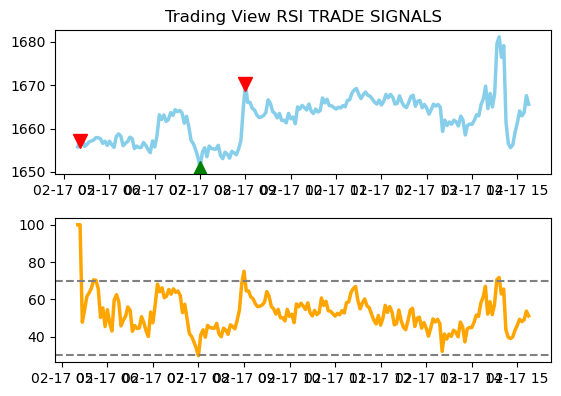

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 05:21:00  1657.16        NaN       NaN       NaN          NaN   
2023-02-17 05:24:00  1657.59        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 15:15:00  1666.01        NaN  1666.325  7.694073  1681.713145   
2023-02-17 15:18:00  1671.31  1662.2482  1666.402  7.737945  1681.877889   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:21:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:24:00          NaN  100.00        NaN     1657.59          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:15:00  1650.936855   51.65        NaN         NaN           0   
2023-02-17 15:18:00  1650.926111   57.57        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:21:00    0     0  
2023-02-17 05:24:00    0     1  
...                  ...   ...  
2023-02-17 15:15:00    0     0  
2023-02-17 15:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


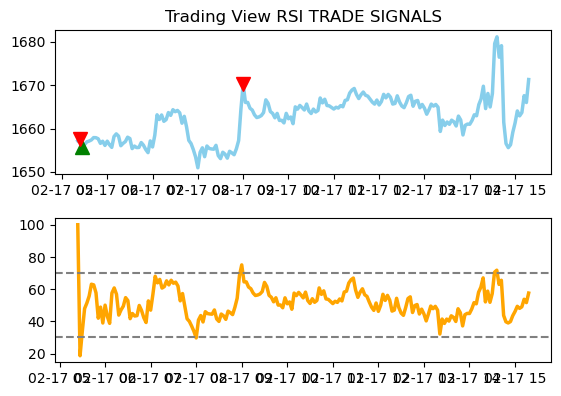

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:24:00  1657.59         NaN        NaN       NaN          NaN   
2023-02-17 05:27:00  1655.85         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:18:00  1673.63         NaN  1666.5180  7.832209  1682.182417   
2023-02-17 15:21:00  1673.31  1662.34055  1666.9535  7.961042  1682.875584   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:24:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:27:00          NaN   0.00    1655.85         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:18:00  1650.853583  59.73        NaN         NaN           0   
2023-02-17 15:21:00  1651.031416  59.28        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:24:00    0     0  
2023-02-17 05:27:00    1     0  
...                  ...   ...  
2023-02-17 15:18:00    0     0  
2023-02-17 15:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


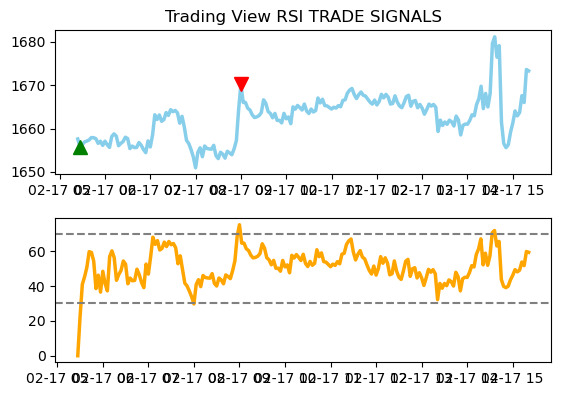

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:27:00  1655.85         NaN       NaN       NaN          NaN   
2023-02-17 05:30:00  1656.31         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 15:21:00  1672.56         NaN  1666.916  7.931235  1682.778470   
2023-02-17 15:24:00  1670.68  1662.40225  1667.045  7.972381  1682.989762   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:27:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:30:00          NaN  100.00        NaN     1656.31          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:21:00  1651.053530   58.25        NaN         NaN           0   
2023-02-17 15:24:00  1651.100238   55.66        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:27:00    0     0  
2023-02-17 05:30:00    0     1  
...                  ...   ...  
2023-02-17 15:21:00    0     0  
2023-02-17 15:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


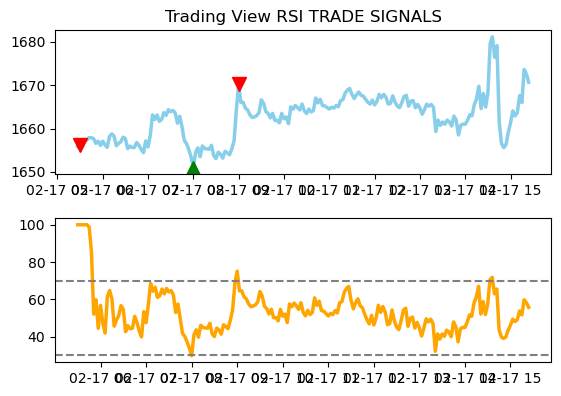

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:30:00  1656.31        NaN        NaN       NaN          NaN   
2023-02-17 05:33:00  1656.92        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 15:24:00  1668.99        NaN  1666.9605  7.940719  1682.841938   
2023-02-17 15:27:00  1669.87  1662.4639  1667.2050  7.951804  1683.108608   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:30:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:33:00          NaN  100.00        NaN     1656.92          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:24:00  1651.079062   53.52        NaN         NaN           0   
2023-02-17 15:27:00  1651.301392   54.50        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:30:00    0     0  
2023-02-17 05:33:00    0     1  
...                  ...   ...  
2023-02-17 15:24:00    0     0  
2023-02-17 15:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


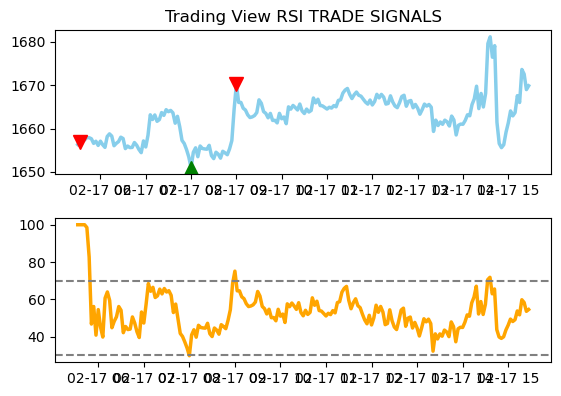

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:33:00  1656.92         NaN        NaN       NaN          NaN   
2023-02-17 05:36:00  1657.11         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:27:00  1666.40         NaN  1667.0315  7.928417  1682.888335   
2023-02-17 15:30:00  1669.29  1662.51145  1667.0900  7.941178  1682.972356   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:33:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:36:00          NaN  100.00        NaN     1657.11          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:27:00  1651.174665   50.32        NaN         NaN           0   
2023-02-17 15:30:00  1651.207644   53.65        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:33:00    0     0  
2023-02-17 05:36:00    0     1  
...                  ...   ...  
2023-02-17 15:27:00    0     0  
2023-02-17 15:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


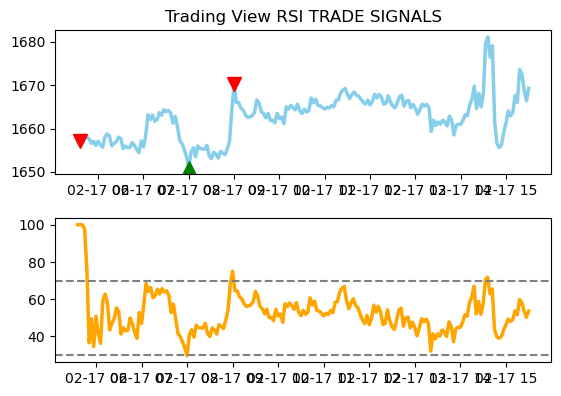

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:36:00  1657.11         NaN        NaN       NaN          NaN   
2023-02-17 05:39:00  1657.37         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:30:00  1670.84         NaN  1667.1675  7.971285  1683.110069   
2023-02-17 15:33:00  1670.17  1662.58545  1666.6955  7.458763  1681.613026   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:36:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:39:00          NaN  100.00        NaN     1657.37          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:30:00  1651.224931   55.25        NaN         NaN           0   
2023-02-17 15:33:00  1651.777974   54.38        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:36:00    0     0  
2023-02-17 05:39:00    0     1  
...                  ...   ...  
2023-02-17 15:30:00    0     0  
2023-02-17 15:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


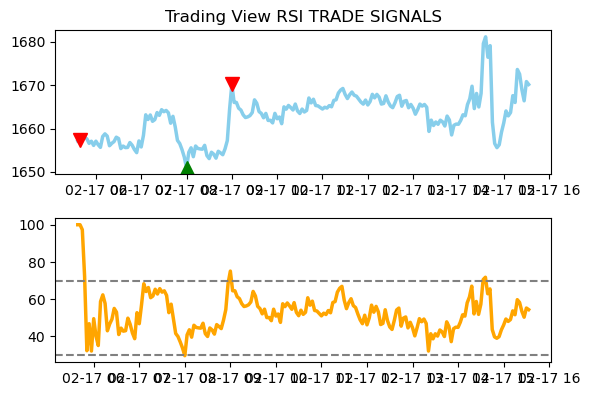

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 05:39:00  1657.37        NaN       NaN       NaN          NaN   
2023-02-17 05:42:00  1657.91        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 15:33:00  1671.98        NaN  1666.786  7.513916  1681.813832   
2023-02-17 15:36:00  1673.59  1662.6769  1666.407  6.917719  1680.242437   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:42:00          NaN  100.00        NaN     1657.91          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:33:00  1651.758168   56.45        NaN         NaN           0   
2023-02-17 15:36:00  1652.571563   58.15        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:39:00    0     0  
2023-02-17 05:42:00    0     1  
...                  ...   ...  
2023-02-17 15:33:00    0     0  
2023-02-17 15:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


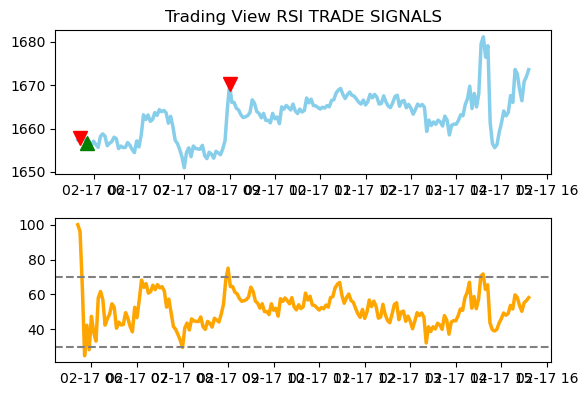

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:42:00  1657.91         NaN       NaN       NaN          NaN   
2023-02-17 05:45:00  1657.89         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 15:36:00  1669.31         NaN  1666.193  6.747935  1679.688869   
2023-02-17 15:39:00  1673.20  1662.73465  1666.030  6.522484  1679.074968   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:42:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:45:00          NaN   0.00    1657.89         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:36:00  1652.697131  52.88        NaN         NaN           0   
2023-02-17 15:39:00  1652.985032  57.13        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:42:00    0     0  
2023-02-17 05:45:00    1     0  
...                  ...   ...  
2023-02-17 15:36:00    0     0  
2023-02-17 15:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


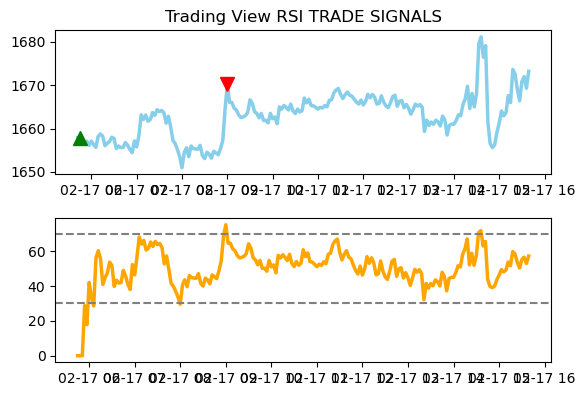

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 05:45:00  1657.89        NaN        NaN       NaN          NaN   
2023-02-17 05:48:00  1657.65        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 15:39:00  1679.28        NaN  1666.3340  6.998566  1680.331131   
2023-02-17 15:42:00  1678.32  1662.8671  1666.2935  6.922550  1680.138600   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:45:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:48:00          NaN   0.00    1657.65         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:39:00  1652.336869  62.43        NaN         NaN           0   
2023-02-17 15:42:00  1652.448400  61.14        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:45:00    0     0  
2023-02-17 05:48:00    1     0  
...                  ...   ...  
2023-02-17 15:39:00    0     0  
2023-02-17 15:42:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


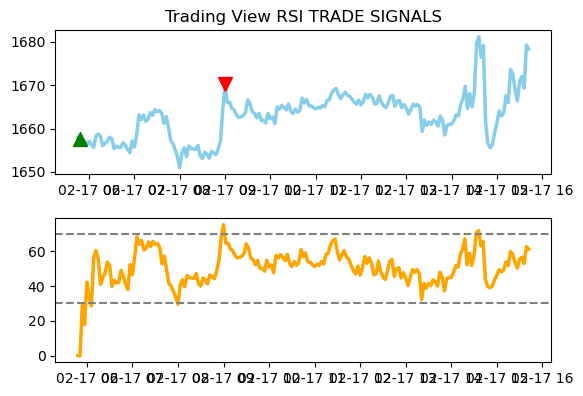

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 05:48:00  1657.65        NaN       NaN       NaN          NaN   
2023-02-17 05:51:00  1656.58        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 15:42:00  1675.37        NaN  1666.146  6.679991  1679.505982   
2023-02-17 15:45:00  1674.20  1662.9339  1666.784  6.814856  1680.413711   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:48:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:51:00          NaN   0.00    1656.58         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:42:00  1652.786018  57.51        NaN         NaN           0   
2023-02-17 15:45:00  1653.154289  56.08        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:48:00    0     0  
2023-02-17 05:51:00    1     0  
...                  ...   ...  
2023-02-17 15:42:00    0     0  
2023-02-17 15:45:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


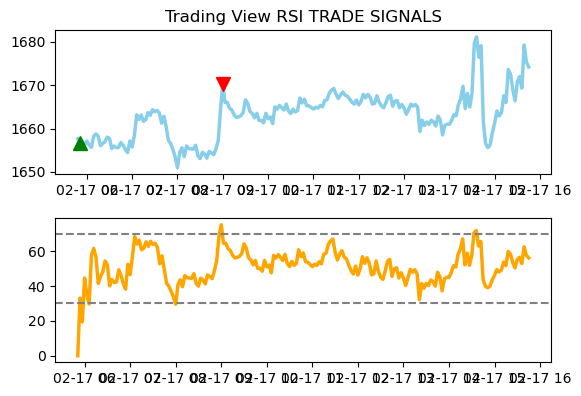

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:51:00  1656.58         NaN        NaN       NaN          NaN   
2023-02-17 05:54:00  1657.07         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:45:00  1673.95         NaN  1666.7715  6.800752  1680.373003   
2023-02-17 15:48:00  1672.95  1663.00915  1667.5920  6.483908  1680.559815   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:51:00          NaN     NaN        NaN         NaN           0   
2023-02-17 05:54:00          NaN  100.00        NaN     1657.07          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:45:00  1653.169997   55.79        NaN         NaN           0   
2023-02-17 15:48:00  1654.624185   54.55        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:51:00    0     0  
2023-02-17 05:54:00    0     1  
...                  ...   ...  
2023-02-17 15:45:00    0     0  
2023-02-17 15:48:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


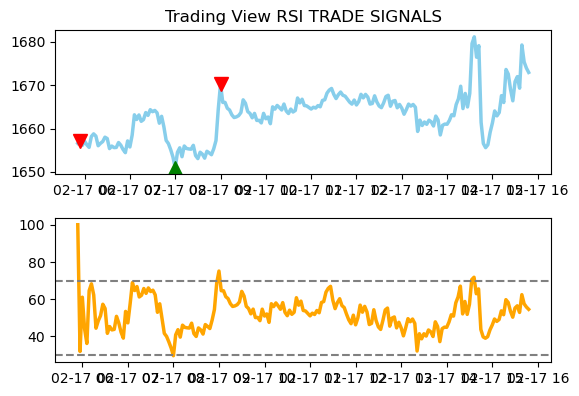

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:54:00  1657.07         NaN        NaN       NaN          NaN   
2023-02-17 05:57:00  1656.10         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:48:00  1673.74         NaN  1667.6315  6.520569  1680.672639   
2023-02-17 15:51:00  1673.47  1663.09755  1668.5255  5.986583  1680.498666   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 05:54:00          NaN    NaN        NaN         NaN           0   
2023-02-17 05:57:00          NaN   0.00     1656.1         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:48:00  1654.590361  55.52        NaN         NaN           0   
2023-02-17 15:51:00  1656.552334  55.16        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:54:00    0     0  
2023-02-17 05:57:00    1     0  
...                  ...   ...  
2023-02-17 15:48:00    0     0  
2023-02-17 15:51:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


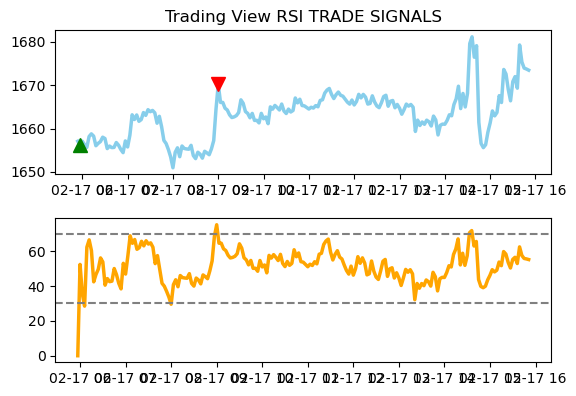

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 05:57:00  1656.10         NaN        NaN       NaN          NaN   
2023-02-17 06:00:00  1657.09         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:51:00  1671.89         NaN  1668.4465  5.928039  1680.302578   
2023-02-17 15:54:00  1674.21  1663.17535  1669.3440  5.312786  1679.969573   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 05:57:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:00:00          NaN  100.00        NaN     1657.09          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 15:51:00  1656.590422   53.14        NaN         NaN           0   
2023-02-17 15:54:00  1658.718427   55.71        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 05:57:00    0     0  
2023-02-17 06:00:00    0     1  
...                  ...   ...  
2023-02-17 15:51:00    0     0  
2023-02-17 15:54:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


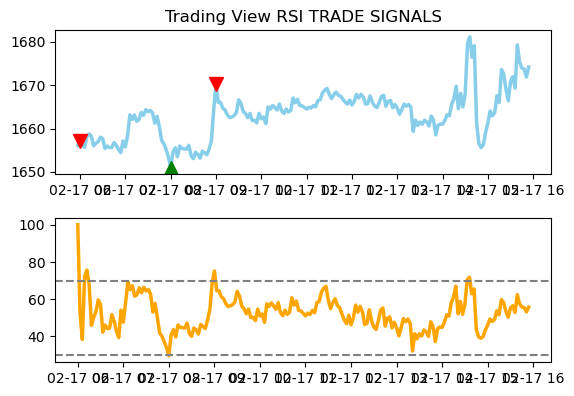

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:00:00  1657.09         NaN        NaN       NaN          NaN   
2023-02-17 06:03:00  1656.26         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 15:54:00  1673.49         NaN  1669.3080  5.280419  1679.868838   
2023-02-17 15:57:00  1672.72  1663.25485  1669.9865  4.751860  1679.490220   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:00:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:03:00          NaN   0.00    1656.26         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:54:00  1658.747162  54.94        NaN         NaN           0   
2023-02-17 15:57:00  1660.482780  53.87        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:00:00    0     0  
2023-02-17 06:03:00    1     0  
...                  ...   ...  
2023-02-17 15:54:00    0     0  
2023-02-17 15:57:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


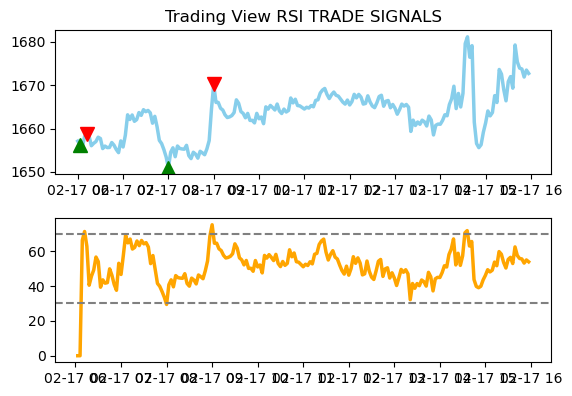

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:03:00  1656.26        NaN        NaN       NaN          NaN   
2023-02-17 06:06:00  1655.66        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 15:57:00  1673.46        NaN  1670.0235  4.777078  1679.577656   
2023-02-17 16:00:00  1677.20  1663.3591  1670.8185  4.567340  1679.953179   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:03:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:06:00          NaN   0.00    1655.66         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 15:57:00  1660.469344  54.90        NaN         NaN           0   
2023-02-17 16:00:00  1661.683821  59.16        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:03:00    0     0  
2023-02-17 06:06:00    1     0  
...                  ...   ...  
2023-02-17 15:57:00    0     0  
2023-02-17 16:00:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


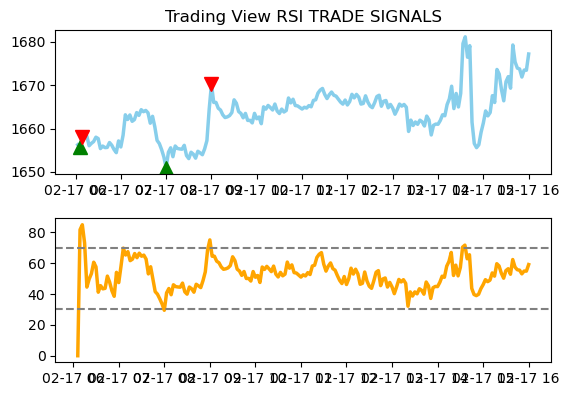

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:06:00  1655.66        NaN        NaN       NaN          NaN   
2023-02-17 06:09:00  1658.16        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:00:00  1673.88        NaN  1670.6525  4.379674  1679.411848   
2023-02-17 16:03:00  1672.52  1663.4238  1671.0755  4.109663  1679.294826   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:06:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:09:00          NaN  100.00        NaN     1658.16          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:00:00  1661.893152   55.42        NaN         NaN           0   
2023-02-17 16:03:00  1662.856174   53.27        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:06:00    0     0  
2023-02-17 06:09:00    0     1  
...                  ...   ...  
2023-02-17 16:00:00    0     0  
2023-02-17 16:03:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


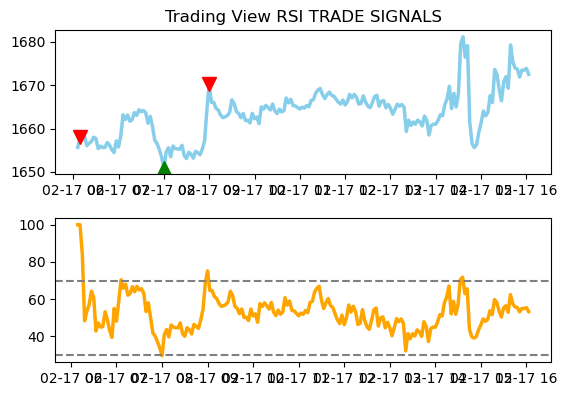

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:09:00  1658.16        NaN        NaN       NaN          NaN   
2023-02-17 06:12:00  1658.77        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:03:00  1674.92        NaN  1671.1955  4.188348  1679.572196   
2023-02-17 16:06:00  1678.18  1663.5484  1671.9585  3.986549  1679.931598   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:09:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:12:00          NaN  100.00        NaN     1658.77          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:03:00  1662.818804   56.76        NaN         NaN           0   
2023-02-17 16:06:00  1663.985402   60.73        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:09:00    0     0  
2023-02-17 06:12:00    0     1  
...                  ...   ...  
2023-02-17 16:03:00    0     0  
2023-02-17 16:06:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


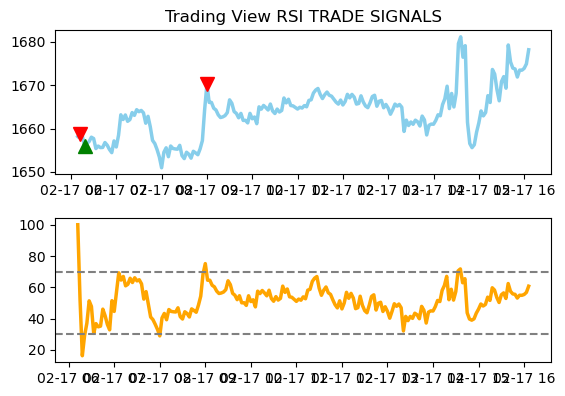

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:12:00  1658.77        NaN        NaN       NaN          NaN   
2023-02-17 06:15:00  1658.25        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:06:00  1682.95        NaN  1672.1970  4.489328  1681.175656   
2023-02-17 16:09:00  1680.67  1663.6848  1673.0455  4.401680  1681.848859   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:12:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:15:00          NaN   0.00    1658.25         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:06:00  1663.218344  65.38        NaN         NaN           0   
2023-02-17 16:09:00  1664.242141  61.63        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:12:00    0     0  
2023-02-17 06:15:00    1     0  
...                  ...   ...  
2023-02-17 16:06:00    0     0  
2023-02-17 16:09:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


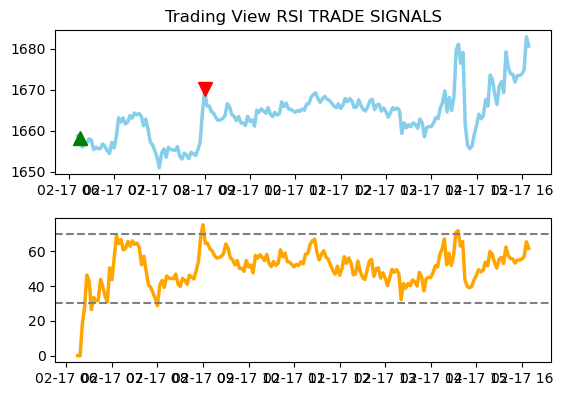

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:15:00  1658.25         NaN        NaN       NaN          NaN   
2023-02-17 06:18:00  1656.03         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:09:00  1682.33         NaN  1673.1285  4.565616  1682.259731   
2023-02-17 16:12:00  1680.00  1663.79925  1673.7490  4.616299  1682.981599   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:15:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:18:00          NaN   0.00    1656.03         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:09:00  1663.997269  64.32        NaN         NaN           0   
2023-02-17 16:12:00  1664.516401  60.33        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:15:00    0     0  
2023-02-17 06:18:00    1     0  
...                  ...   ...  
2023-02-17 16:09:00    0     0  
2023-02-17 16:12:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


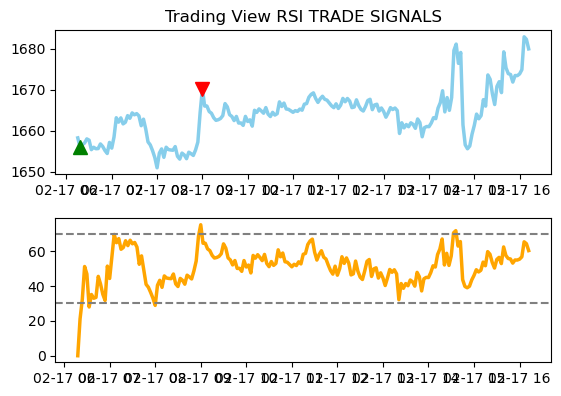

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:18:00  1656.03        NaN        NaN       NaN          NaN   
2023-02-17 06:21:00  1656.58        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:12:00  1681.50        NaN  1673.8240  4.733891  1683.291781   
2023-02-17 16:15:00  1676.84  1663.8997  1674.3655  4.400705  1683.166910   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:18:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:21:00          NaN  100.00        NaN     1656.58          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:12:00  1664.356219   62.84        NaN         NaN           0   
2023-02-17 16:15:00  1665.564090   55.17        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:18:00    0     0  
2023-02-17 06:21:00    0     1  
...                  ...   ...  
2023-02-17 16:12:00    0     0  
2023-02-17 16:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


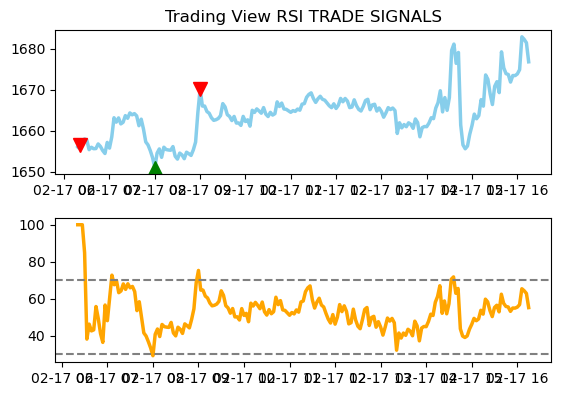

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:21:00  1656.58         NaN        NaN       NaN          NaN   
2023-02-17 06:24:00  1656.99         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:15:00  1675.74         NaN  1674.3105  4.374950  1683.060399   
2023-02-17 16:18:00  1673.84  1663.98325  1674.3210  4.373482  1683.067964   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:21:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:24:00          NaN  100.00        NaN     1656.99          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:15:00  1665.560601   53.63        NaN         NaN           0   
2023-02-17 16:18:00  1665.574036   50.97        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:21:00    0     0  
2023-02-17 06:24:00    0     1  
...                  ...   ...  
2023-02-17 16:15:00    0     0  
2023-02-17 16:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


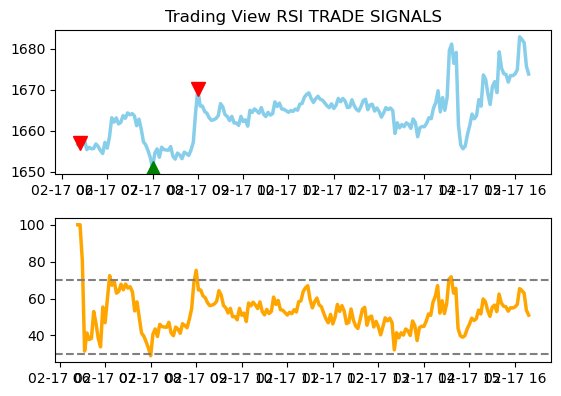

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:24:00  1656.99         NaN       NaN       NaN          NaN   
2023-02-17 06:27:00  1658.00         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 16:18:00  1671.06         NaN  1674.182  4.433342  1683.048684   
2023-02-17 16:21:00  1670.76  1664.04025  1674.092  4.485961  1683.063923   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:24:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:27:00          NaN  100.00        NaN      1658.0          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:18:00  1665.315316   47.53        NaN         NaN           0   
2023-02-17 16:21:00  1665.120077   47.16        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:24:00    0     0  
2023-02-17 06:27:00    0     1  
...                  ...   ...  
2023-02-17 16:18:00    0     0  
2023-02-17 16:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


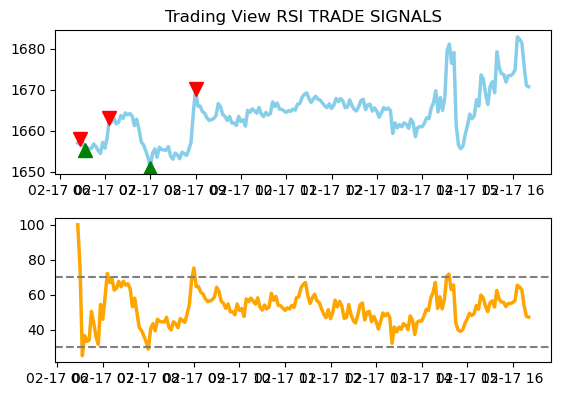

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:27:00  1658.00        NaN        NaN       NaN          NaN   
2023-02-17 06:30:00  1657.69        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:21:00  1670.29        NaN  1674.0685  4.505523  1683.079546   
2023-02-17 16:24:00  1669.27  1664.0993  1674.0825  4.489318  1683.061136   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:27:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:30:00          NaN   0.00    1657.69         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:21:00  1665.057454  46.59        NaN         NaN           0   
2023-02-17 16:24:00  1665.103864  45.32        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:27:00    0     0  
2023-02-17 06:30:00    1     0  
...                  ...   ...  
2023-02-17 16:21:00    0     0  
2023-02-17 16:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


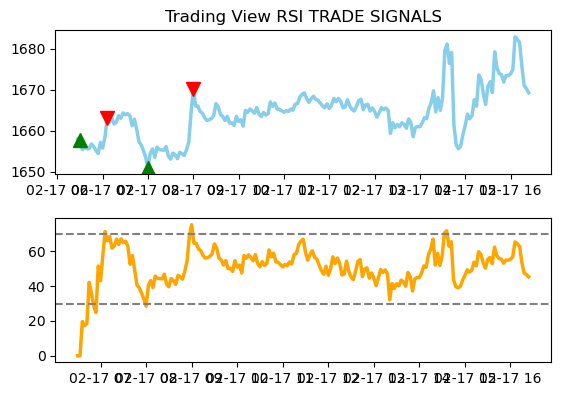

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:30:00  1657.69        NaN        NaN       NaN          NaN   
2023-02-17 06:33:00  1655.37        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:24:00  1667.56        NaN  1673.9970  4.600699  1683.198398   
2023-02-17 16:27:00  1666.17  1664.1316  1673.9855  4.620931  1683.227362   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:30:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:33:00          NaN   0.00    1655.37         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:24:00  1664.795602  43.33        NaN         NaN           0   
2023-02-17 16:27:00  1664.743638  41.72        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:30:00    0     0  
2023-02-17 06:33:00    1     0  
...                  ...   ...  
2023-02-17 16:24:00    0     0  
2023-02-17 16:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


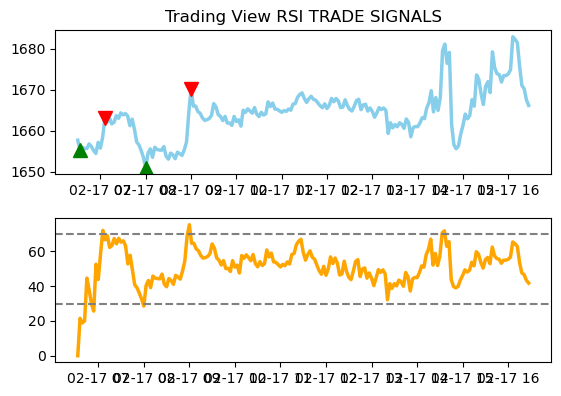

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:33:00  1655.37         NaN        NaN       NaN          NaN   
2023-02-17 06:36:00  1655.96         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:27:00  1667.94         NaN  1674.0740  4.478113  1683.030227   
2023-02-17 16:30:00  1666.19  1664.18295  1673.8415  4.766296  1683.374093   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:33:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:36:00          NaN  100.00        NaN     1655.96          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:27:00  1665.117773   43.91        NaN         NaN           0   
2023-02-17 16:30:00  1664.308907   41.76        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:33:00    0     0  
2023-02-17 06:36:00    0     1  
...                  ...   ...  
2023-02-17 16:27:00    0     0  
2023-02-17 16:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


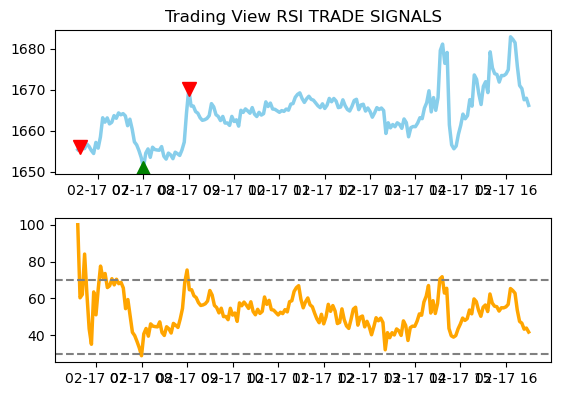

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:36:00  1655.96         NaN       NaN       NaN          NaN   
2023-02-17 06:39:00  1655.60         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 16:30:00  1665.36         NaN  1673.800  4.839476  1683.478952   
2023-02-17 16:33:00  1664.82  1664.22605  1673.442  5.230250  1683.902499   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:36:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:39:00          NaN   0.00     1655.6         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:30:00  1664.121048  40.81        NaN         NaN           0   
2023-02-17 16:33:00  1662.981501  40.17        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:36:00    0     0  
2023-02-17 06:39:00    1     0  
...                  ...   ...  
2023-02-17 16:30:00    0     0  
2023-02-17 16:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


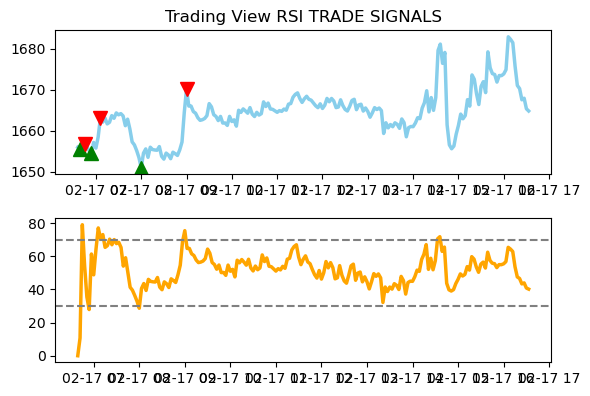

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:39:00  1655.60         NaN        NaN       NaN          NaN   
2023-02-17 06:42:00  1655.64         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:33:00  1666.88         NaN  1673.5450  5.069327  1683.683655   
2023-02-17 16:36:00  1671.90  1664.31605  1673.6745  4.987874  1683.650248   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:42:00          NaN  100.00        NaN     1655.64          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:33:00  1663.406345   43.35        NaN         NaN           0   
2023-02-17 16:36:00  1663.698752   50.85        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:39:00    0     0  
2023-02-17 06:42:00    0     1  
...                  ...   ...  
2023-02-17 16:33:00    0     0  
2023-02-17 16:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


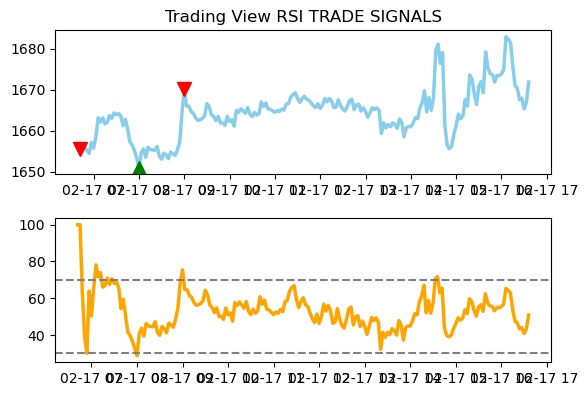

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:42:00  1655.64         NaN        NaN       NaN          NaN   
2023-02-17 06:45:00  1656.77         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:36:00  1670.02         NaN  1673.5805  5.040513  1683.661526   
2023-02-17 16:39:00  1672.16  1664.38945  1673.2245  4.865169  1682.954838   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:42:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:45:00          NaN  100.00        NaN     1656.77          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:36:00  1663.499474   48.29        NaN         NaN           0   
2023-02-17 16:39:00  1663.494162   51.40        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:42:00    0     0  
2023-02-17 06:45:00    0     1  
...                  ...   ...  
2023-02-17 16:36:00    0     0  
2023-02-17 16:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


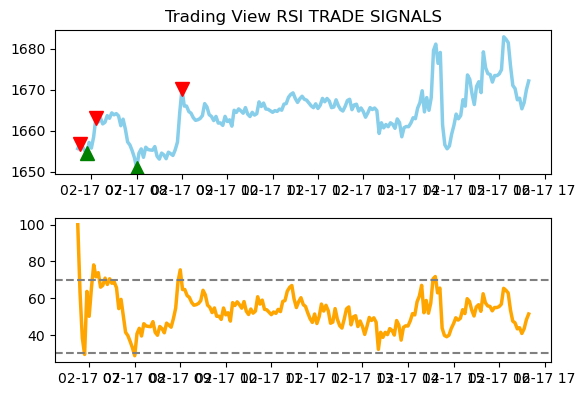

Close      SMA200     SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:45:00  1656.77         NaN       NaN       NaN          NaN   
2023-02-17 06:48:00  1656.15         NaN       NaN       NaN          NaN   
...                      ...         ...       ...       ...          ...   
2023-02-17 16:39:00  1674.05         NaN  1673.319  4.861758  1683.042517   
2023-02-17 16:42:00  1673.19  1664.48665  1673.210  4.837733  1682.885467   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:45:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:48:00          NaN   0.00    1656.15         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:39:00  1663.595483  53.85        NaN         NaN           0   
2023-02-17 16:42:00  1663.534533  52.55        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:45:00    0     0  
2023-02-17 06:48:00    1     0  
...                  ...   ...  
2023-02-17 16:39:00    0     0  
2023-02-17 16:42:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


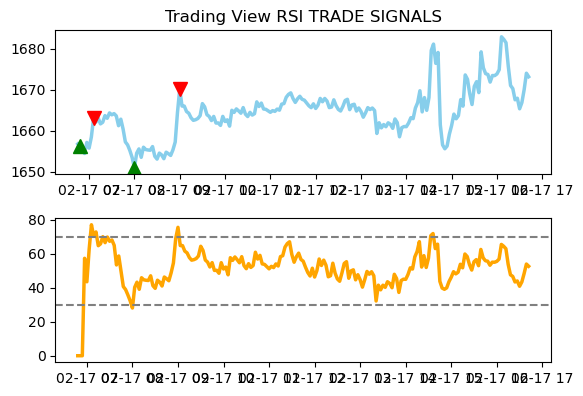

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:48:00  1656.15        NaN        NaN       NaN          NaN   
2023-02-17 06:51:00  1655.16        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:42:00  1675.30        NaN  1673.3155  4.860229  1683.035958   
2023-02-17 16:45:00  1677.09  1664.5988  1673.4725  4.931990  1683.336480   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:48:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:51:00          NaN   0.00    1655.16         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:42:00  1663.595042  55.45        NaN         NaN           0   
2023-02-17 16:45:00  1663.608520  57.71        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:48:00    0     0  
2023-02-17 06:51:00    1     0  
...                  ...   ...  
2023-02-17 16:42:00    0     0  
2023-02-17 16:45:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


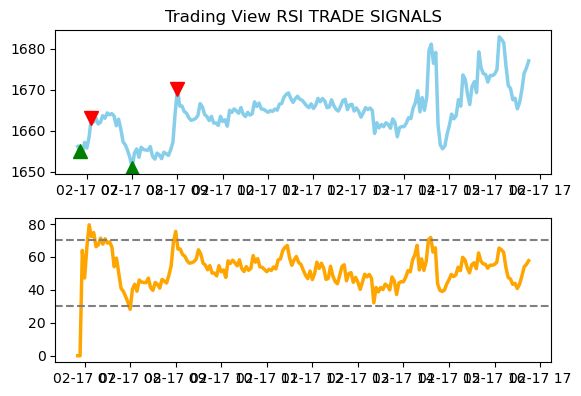

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 06:51:00  1655.16         NaN        NaN       NaN          NaN   
2023-02-17 06:54:00  1654.44         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 16:45:00  1676.89         NaN  1673.4625  4.924466  1683.311432   
2023-02-17 16:48:00  1675.18  1664.69295  1673.5345  4.939242  1683.412984   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:51:00          NaN    NaN        NaN         NaN           0   
2023-02-17 06:54:00          NaN   0.00    1654.44         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:45:00  1663.613568  57.47        NaN         NaN           0   
2023-02-17 16:48:00  1663.656016  54.60        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:51:00    0     0  
2023-02-17 06:54:00    1     0  
...                  ...   ...  
2023-02-17 16:45:00    0     0  
2023-02-17 16:48:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


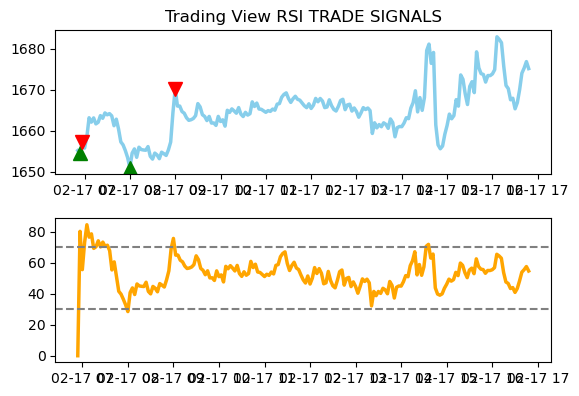

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:54:00  1654.44        NaN        NaN       NaN          NaN   
2023-02-17 06:57:00  1657.14        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:48:00  1675.92        NaN  1673.5715  4.954964  1683.481428   
2023-02-17 16:51:00  1674.89  1664.7953  1673.7215  4.946783  1683.615067   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 06:54:00          NaN     NaN        NaN         NaN           0   
2023-02-17 06:57:00          NaN  100.00        NaN     1657.14          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:48:00  1663.661572   55.80        NaN         NaN           0   
2023-02-17 16:51:00  1663.827933   54.02        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:54:00    0     0  
2023-02-17 06:57:00    0     1  
...                  ...   ...  
2023-02-17 16:48:00    0     0  
2023-02-17 16:51:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


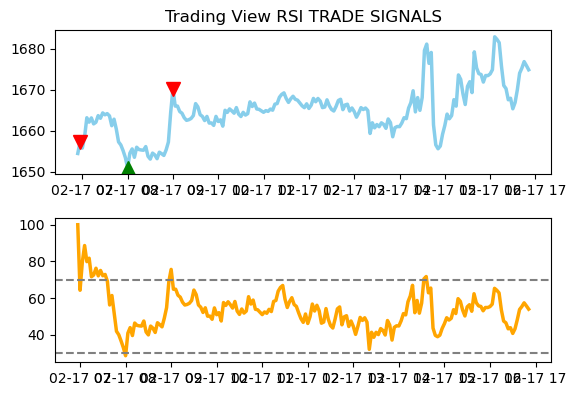

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 06:57:00  1657.14        NaN        NaN       NaN          NaN   
2023-02-17 07:00:00  1655.75        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:51:00  1673.07        NaN  1673.6305  4.940893  1683.512286   
2023-02-17 16:54:00  1673.02  1664.8791  1673.6070  4.942714  1683.492428   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 06:57:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:00:00          NaN   0.00    1655.75         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 16:51:00  1663.748714  51.13        NaN         NaN           0   
2023-02-17 16:54:00  1663.721572  51.05        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 06:57:00    0     0  
2023-02-17 07:00:00    1     0  
...                  ...   ...  
2023-02-17 16:51:00    0     0  
2023-02-17 16:54:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


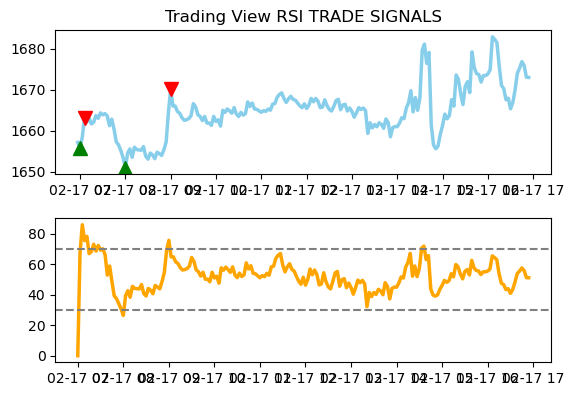

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 07:00:00  1655.75        NaN        NaN       NaN          NaN   
2023-02-17 07:03:00  1658.47        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:54:00  1671.77        NaN  1673.5445  4.958405  1683.461311   
2023-02-17 16:57:00  1671.63  1664.9453  1673.4530  4.976897  1683.406795   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:00:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:03:00          NaN  100.00        NaN     1658.47          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:54:00  1663.627689   49.10        NaN         NaN           0   
2023-02-17 16:57:00  1663.499205   48.88        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:00:00    0     0  
2023-02-17 07:03:00    0     1  
...                  ...   ...  
2023-02-17 16:54:00    0     0  
2023-02-17 16:57:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


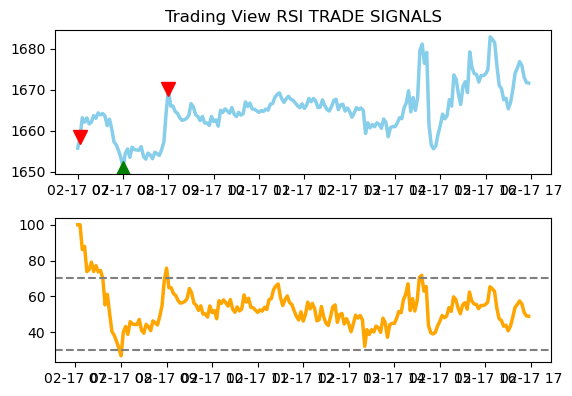

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 07:03:00  1658.47        NaN        NaN       NaN          NaN   
2023-02-17 07:06:00  1663.17        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 16:57:00  1672.99        NaN  1673.5210  4.959940  1683.440881   
2023-02-17 17:00:00  1678.83  1665.0675  1673.7685  5.100313  1683.969126   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:03:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:06:00          NaN  100.00        NaN     1663.17          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 16:57:00  1663.601119   51.06        NaN         NaN           0   
2023-02-17 17:00:00  1663.567874   59.15        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:03:00    0     0  
2023-02-17 07:06:00    0     1  
...                  ...   ...  
2023-02-17 16:57:00    0     0  
2023-02-17 17:00:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


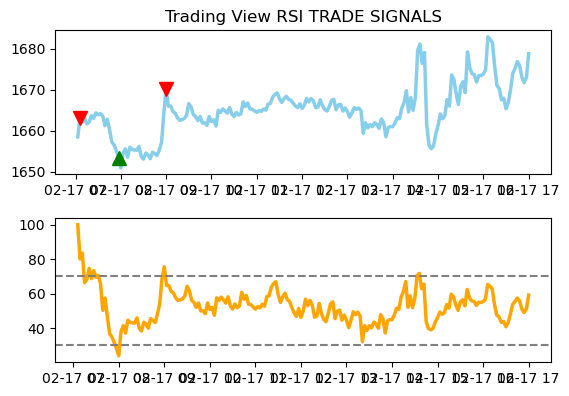

Close    SMA200      SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 07:06:00  1663.17       NaN        NaN       NaN          NaN   
2023-02-17 07:09:00  1662.09       NaN        NaN       NaN          NaN   
...                      ...       ...        ...       ...          ...   
2023-02-17 17:00:00  1678.27       NaN  1673.7405  5.072525  1683.885550   
2023-02-17 17:03:00  1677.13  1665.158  1673.8510  5.123388  1684.097776   

                           Lower   RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                        
2023-02-17 07:06:00          NaN   NaN        NaN         NaN           0   
2023-02-17 07:09:00          NaN   0.0    1662.09         NaN           1   
...                          ...   ...        ...         ...         ...   
2023-02-17 17:00:00  1663.595450  58.5        NaN         NaN           0   
2023-02-17 17:03:00  1663.604224  56.5        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:06:00    0     0  
2023-02-17 07:09:00    1     0  
...                  ...   ...  
2023-02-17 17:00:00    0     0  
2023-02-17 17:03:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


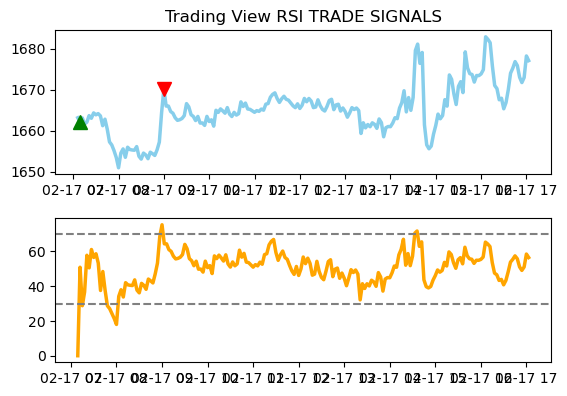

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 07:09:00  1662.09         NaN        NaN       NaN          NaN   
2023-02-17 07:12:00  1663.13         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 17:03:00  1679.79         NaN  1673.9840  5.246047  1684.476093   
2023-02-17 17:06:00  1681.44  1665.26265  1673.9085  5.119559  1684.147619   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:09:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:12:00          NaN  100.00        NaN     1663.13          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:03:00  1663.491907   60.36        NaN         NaN           0   
2023-02-17 17:06:00  1663.669381   62.34        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:09:00    0     0  
2023-02-17 07:12:00    0     1  
...                  ...   ...  
2023-02-17 17:03:00    0     0  
2023-02-17 17:06:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


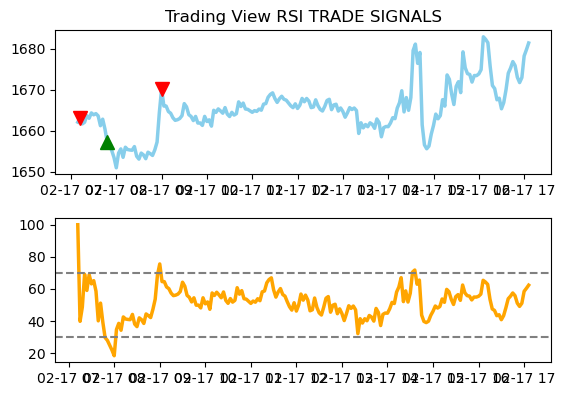

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 07:12:00  1663.13         NaN        NaN       NaN          NaN   
2023-02-17 07:15:00  1661.67         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 17:06:00  1688.64         NaN  1674.2685  5.874519  1686.017538   
2023-02-17 17:09:00  1698.07  1665.47855  1675.0555  7.762344  1690.580188   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:12:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:15:00          NaN   0.00    1661.67         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:06:00  1662.519462  69.08        NaN         NaN           0   
2023-02-17 17:09:00  1659.530812  75.32        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:12:00    0     0  
2023-02-17 07:15:00    1     0  
...                  ...   ...  
2023-02-17 17:06:00    0     0  
2023-02-17 17:09:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


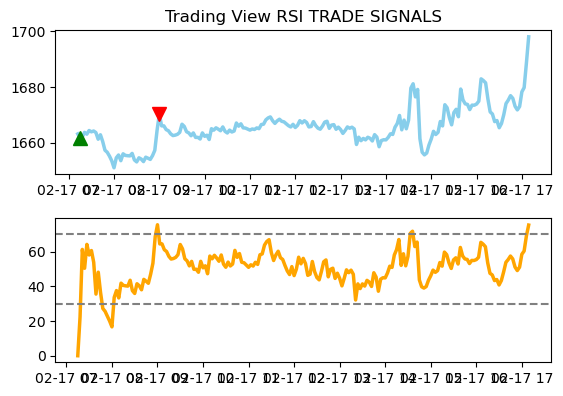

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 07:15:00  1661.67        NaN        NaN       NaN          NaN   
2023-02-17 07:18:00  1662.06        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 17:09:00  1702.66        NaN  1675.2850  8.510407  1692.305814   
2023-02-17 17:12:00  1698.35  1665.6776  1676.1275  9.881629  1695.890759   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:15:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:18:00          NaN  100.00        NaN     1662.06          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:09:00  1658.264186   77.52        NaN         NaN           0   
2023-02-17 17:12:00  1656.364241   71.10        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:15:00    0     0  
2023-02-17 07:18:00    0     1  
...                  ...   ...  
2023-02-17 17:09:00    0     0  
2023-02-17 17:12:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


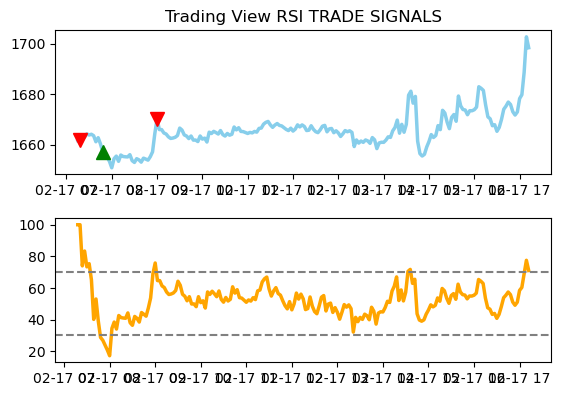

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:18:00  1662.06         NaN        NaN        NaN          NaN   
2023-02-17 07:21:00  1663.69         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:12:00  1698.21         NaN  1676.1205   9.865094  1695.850689   
2023-02-17 17:15:00  1697.30  1665.85505  1677.1985  10.940669  1699.079838   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:18:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:21:00          NaN  100.00        NaN     1663.69          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:12:00  1656.390311   70.91        NaN         NaN           0   
2023-02-17 17:15:00  1655.317162   69.60        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:18:00    0     0  
2023-02-17 07:21:00    0     1  
...                  ...   ...  
2023-02-17 17:12:00    0     0  
2023-02-17 17:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


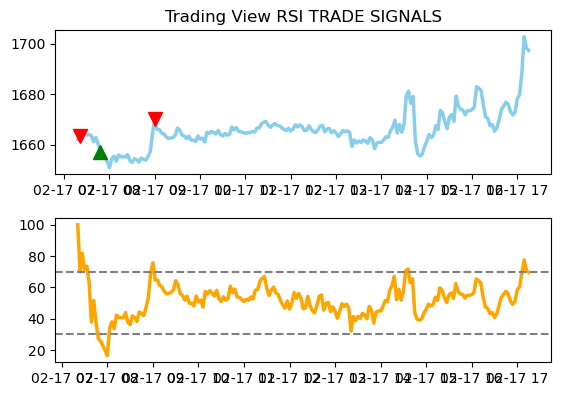

Close     SMA200      SMA20     Stddev        Upper  \
Time                                                                         
2023-02-17 07:21:00  1663.69        NaN        NaN        NaN          NaN   
2023-02-17 07:24:00  1663.04        NaN        NaN        NaN          NaN   
...                      ...        ...        ...        ...          ...   
2023-02-17 17:15:00  1695.34        NaN  1677.1005  10.758395  1698.617290   
2023-02-17 17:18:00  1695.49  1666.0124  1678.3220  11.403976  1701.129953   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:21:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:24:00          NaN   0.00    1663.04         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:15:00  1655.583710  66.94        NaN         NaN           0   
2023-02-17 17:18:00  1655.514047  67.04        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:21:00    0     0  
2023-02-17 07:24:00    1     0  
...                  ...   ...  
2023-02-17 17:15:00    0     0  
2023-02-17 17:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


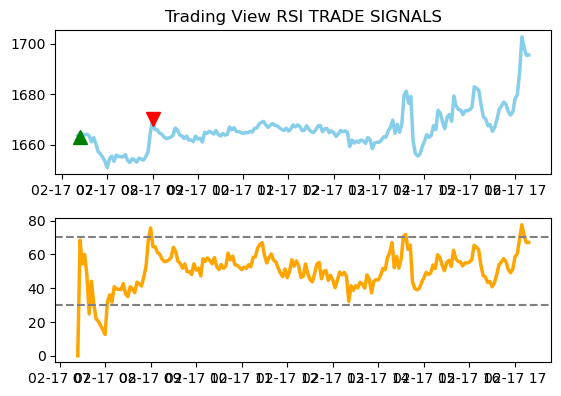

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:24:00  1663.04         NaN        NaN        NaN          NaN   
2023-02-17 07:27:00  1664.35         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:18:00  1697.64         NaN  1678.4295  11.583056  1701.595613   
2023-02-17 17:21:00  1696.21  1666.18575  1679.7255  12.064474  1703.854448   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:24:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:27:00          NaN  100.00        NaN     1664.35          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:18:00  1655.263387   68.46        NaN         NaN           0   
2023-02-17 17:21:00  1655.596552   66.41        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:24:00    0     0  
2023-02-17 07:27:00    0     1  
...                  ...   ...  
2023-02-17 17:18:00    0     0  
2023-02-17 17:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


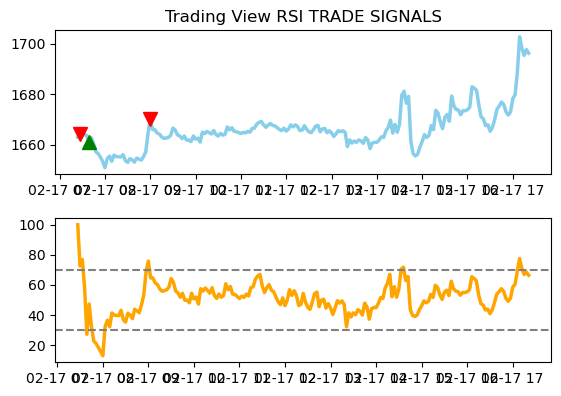

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:27:00  1664.35         NaN        NaN        NaN          NaN   
2023-02-17 07:30:00  1663.89         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:21:00  1698.23         NaN  1679.8265  12.217229  1704.260957   
2023-02-17 17:24:00  1698.46  1666.37295  1681.3715  12.534064  1706.439629   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:27:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:30:00          NaN   0.00    1663.89         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:21:00  1655.392043  68.86        NaN         NaN           0   
2023-02-17 17:24:00  1656.303371  69.02        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:27:00    0     0  
2023-02-17 07:30:00    1     0  
...                  ...   ...  
2023-02-17 17:21:00    0     0  
2023-02-17 17:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


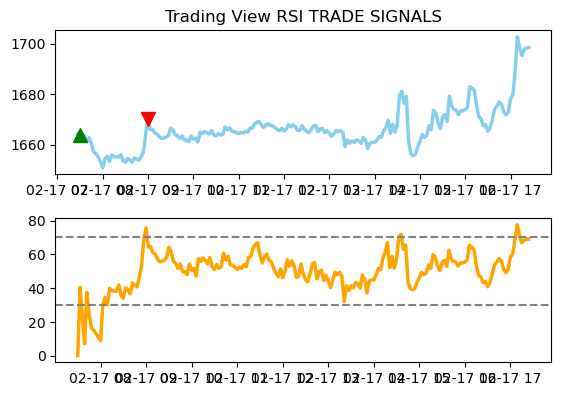

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:30:00  1663.89         NaN        NaN        NaN          NaN   
2023-02-17 07:33:00  1664.18         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:24:00  1698.16         NaN  1681.3565  12.512699  1706.381898   
2023-02-17 17:27:00  1696.29  1666.53115  1682.7740  12.518630  1707.811260   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:30:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:33:00          NaN  100.00        NaN     1664.18          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:24:00  1656.331102   68.75        NaN         NaN           0   
2023-02-17 17:27:00  1657.736740   65.72        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:30:00    0     0  
2023-02-17 07:33:00    0     1  
...                  ...   ...  
2023-02-17 17:24:00    0     0  
2023-02-17 17:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


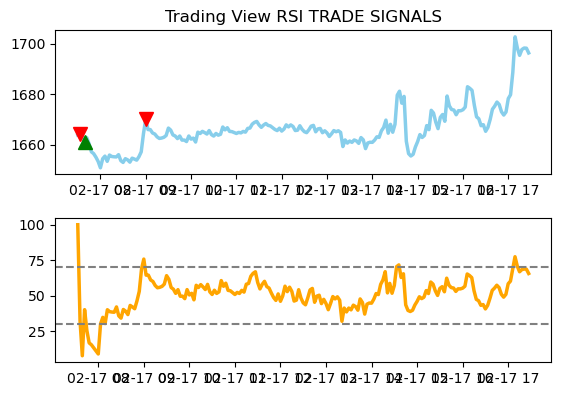

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:33:00  1664.18         NaN        NaN        NaN          NaN   
2023-02-17 07:36:00  1663.62         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:27:00  1696.43         NaN  1682.7810  12.526622  1707.834244   
2023-02-17 17:30:00  1697.69  1666.70085  1684.3975  12.243010  1708.883520   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:33:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:36:00          NaN   0.00    1663.62         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:27:00  1657.727756  65.94        NaN         NaN           0   
2023-02-17 17:30:00  1659.911480  66.99        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:33:00    0     0  
2023-02-17 07:36:00    1     0  
...                  ...   ...  
2023-02-17 17:27:00    0     0  
2023-02-17 17:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


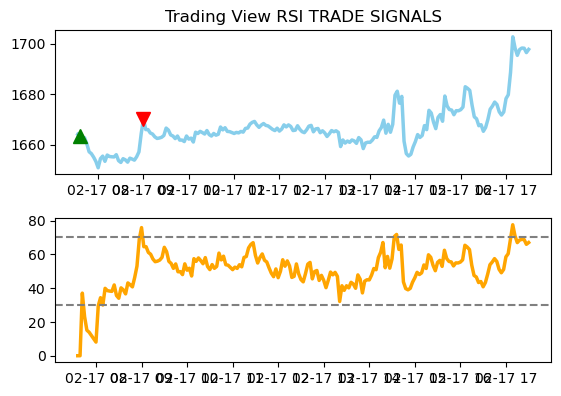

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:36:00  1663.62         NaN        NaN        NaN          NaN   
2023-02-17 07:39:00  1661.23         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:30:00  1700.94         NaN  1684.5600  12.448568  1709.457137   
2023-02-17 17:33:00  1703.75  1666.91495  1686.4035  12.422548  1711.248595   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:36:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:39:00          NaN   0.00    1661.23         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:30:00  1659.662863  69.45        NaN         NaN           0   
2023-02-17 17:33:00  1661.558405  71.42        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:36:00    0     0  
2023-02-17 07:39:00    1     0  
...                  ...   ...  
2023-02-17 17:30:00    0     0  
2023-02-17 17:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


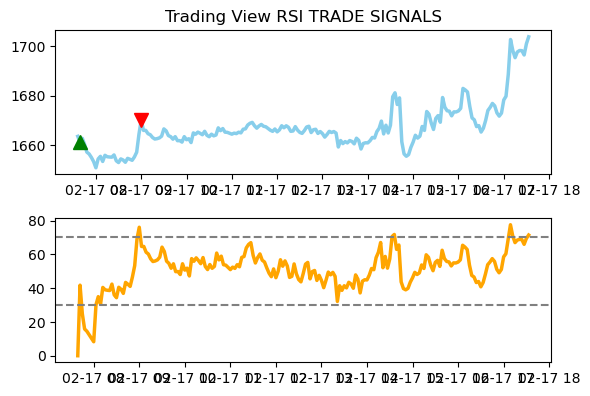

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:39:00  1661.23         NaN        NaN        NaN          NaN   
2023-02-17 07:42:00  1662.82         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:33:00  1701.82         NaN  1686.3070  12.287467  1710.881935   
2023-02-17 17:36:00  1696.67  1667.07055  1687.6395  11.866072  1711.371643   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 07:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 07:42:00          NaN  100.00        NaN     1662.82          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:33:00  1661.732065   70.09        NaN         NaN           0   
2023-02-17 17:36:00  1663.907357   61.83        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:39:00    0     0  
2023-02-17 07:42:00    0     1  
...                  ...   ...  
2023-02-17 17:33:00    0     0  
2023-02-17 17:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


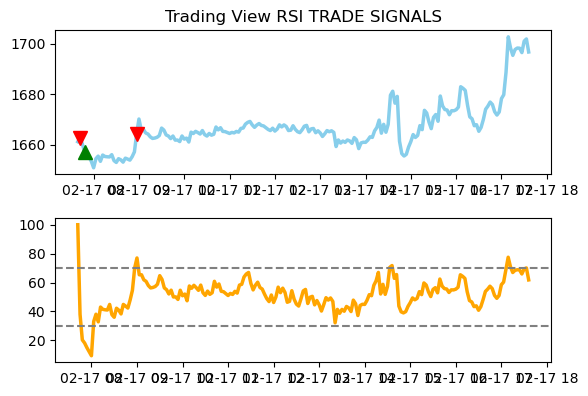

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:42:00  1662.82         NaN        NaN        NaN          NaN   
2023-02-17 07:45:00  1660.41         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:36:00  1697.99         NaN  1687.7055  11.922481  1711.550461   
2023-02-17 17:39:00  1698.41  1667.26305  1688.9235  11.696172  1712.315844   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:42:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:45:00          NaN   0.00    1660.41         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:36:00  1663.860539  63.76        NaN         NaN           0   
2023-02-17 17:39:00  1665.531156  64.14        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:42:00    0     0  
2023-02-17 07:45:00    1     0  
...                  ...   ...  
2023-02-17 17:36:00    0     0  
2023-02-17 17:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


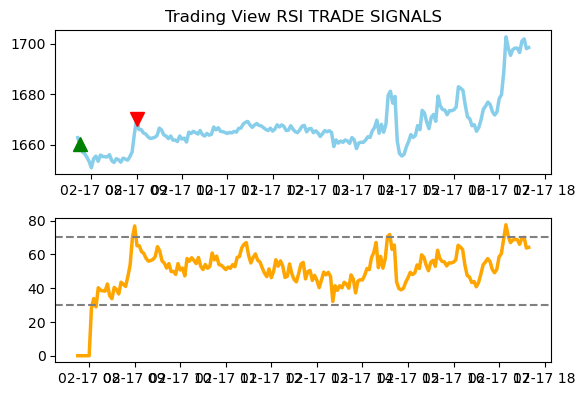

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:45:00  1660.41         NaN        NaN        NaN          NaN   
2023-02-17 07:48:00  1657.27         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:39:00  1697.86         NaN  1688.8960  11.673318  1712.242636   
2023-02-17 17:42:00  1697.65  1667.43445  1690.0135  11.369085  1712.751670   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:45:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:48:00          NaN   0.00    1657.27         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:39:00  1665.549364  63.55        NaN         NaN           0   
2023-02-17 17:42:00  1667.275330  63.19        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:45:00    0     0  
2023-02-17 07:48:00    1     0  
...                  ...   ...  
2023-02-17 17:39:00    0     0  
2023-02-17 17:42:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


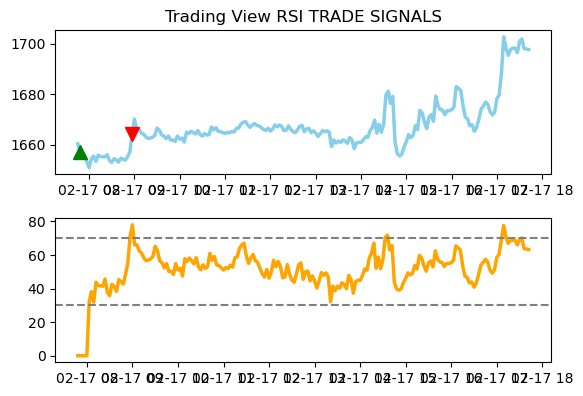

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:48:00  1657.27         NaN        NaN        NaN          NaN   
2023-02-17 07:51:00  1656.53         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:42:00  1699.87         NaN  1690.1245  11.458056  1713.040612   
2023-02-17 17:45:00  1701.69  1667.65195  1691.3645  11.291149  1713.946797   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:48:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:51:00          NaN   0.00    1656.53         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:42:00  1667.208388  65.44        NaN         NaN           0   
2023-02-17 17:45:00  1668.782203  67.11        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:48:00    0     0  
2023-02-17 07:51:00    1     0  
...                  ...   ...  
2023-02-17 17:42:00    0     0  
2023-02-17 17:45:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


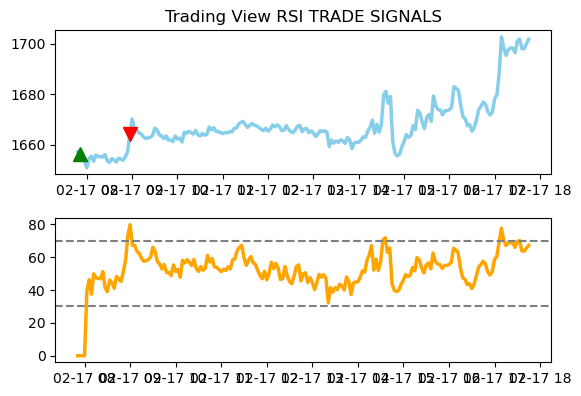

Close      SMA200     SMA20     Stddev        Upper  \
Time                                                                         
2023-02-17 07:51:00  1656.53         NaN       NaN        NaN          NaN   
2023-02-17 07:54:00  1655.14         NaN       NaN        NaN          NaN   
...                      ...         ...       ...        ...          ...   
2023-02-17 17:45:00  1700.54         NaN  1691.307  11.238605  1713.784209   
2023-02-17 17:48:00  1696.74  1667.84355  1692.348  10.689155  1713.726309   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:51:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:54:00          NaN   0.00    1655.14         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:45:00  1668.829791  66.08        NaN         NaN           0   
2023-02-17 17:48:00  1670.969691  59.43        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:51:00    0     0  
2023-02-17 07:54:00    1     0  
...                  ...   ...  
2023-02-17 17:45:00    0     0  
2023-02-17 17:48:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


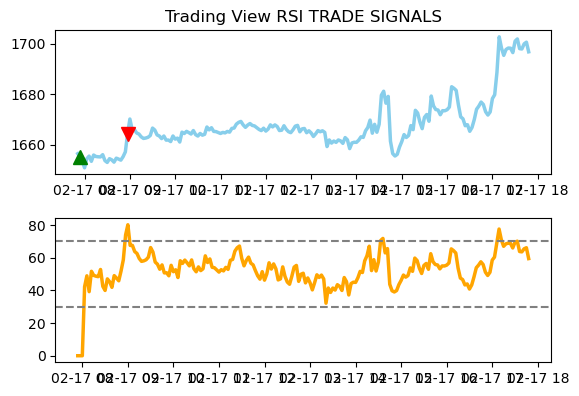

Close      SMA200      SMA20     Stddev        Upper  \
Time                                                                          
2023-02-17 07:54:00  1655.14         NaN        NaN        NaN          NaN   
2023-02-17 07:57:00  1653.44         NaN        NaN        NaN          NaN   
...                      ...         ...        ...        ...          ...   
2023-02-17 17:48:00  1695.95         NaN  1692.3085  10.673519  1713.655538   
2023-02-17 17:51:00  1691.86  1668.01625  1693.2480   9.670857  1712.589715   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:54:00          NaN    NaN        NaN         NaN           0   
2023-02-17 07:57:00          NaN   0.00    1653.44         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:48:00  1670.961462  58.21        NaN         NaN           0   
2023-02-17 17:51:00  1673.906285  52.25        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:54:00    0     0  
2023-02-17 07:57:00    1     0  
...                  ...   ...  
2023-02-17 17:48:00    0     0  
2023-02-17 17:51:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


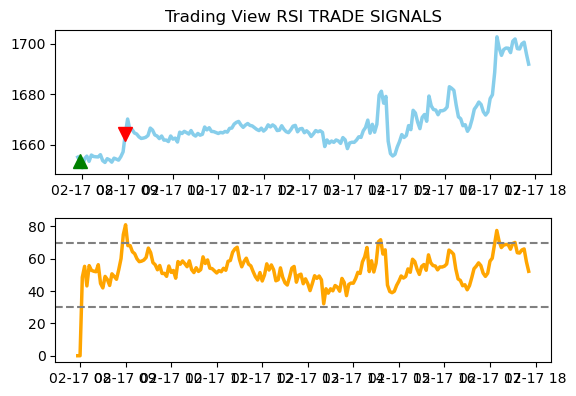

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 07:57:00  1653.44         NaN        NaN       NaN          NaN   
2023-02-17 08:00:00  1650.94         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 17:51:00  1692.37         NaN  1693.2735  9.667677  1712.608853   
2023-02-17 17:54:00  1690.97  1668.19795  1694.2335  8.272621  1710.778743   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 07:57:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:00:00          NaN   0.00    1650.94         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 17:51:00  1673.938147  52.92        NaN         NaN           0   
2023-02-17 17:54:00  1677.688257  50.97        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 07:57:00    0     0  
2023-02-17 08:00:00    1     0  
...                  ...   ...  
2023-02-17 17:51:00    0     0  
2023-02-17 17:54:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


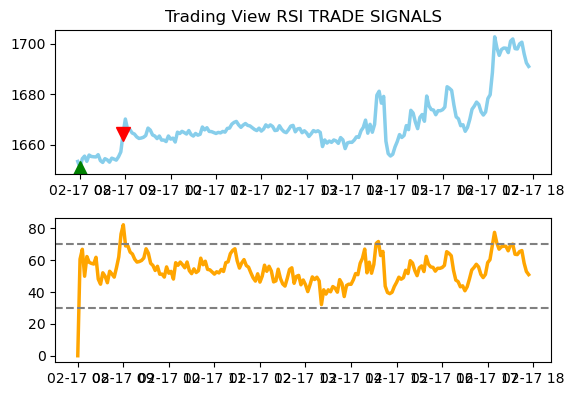

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:00:00  1650.94         NaN        NaN       NaN          NaN   
2023-02-17 08:03:00  1654.52         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 17:54:00  1692.57         NaN  1694.3135  8.247098  1710.807696   
2023-02-17 17:57:00  1689.00  1668.38375  1695.1140  6.700367  1708.514734   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:00:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:03:00          NaN  100.00        NaN     1654.52          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:54:00  1677.819304   53.18        NaN         NaN           0   
2023-02-17 17:57:00  1681.713266   48.14        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:00:00    0     0  
2023-02-17 08:03:00    0     1  
...                  ...   ...  
2023-02-17 17:54:00    0     0  
2023-02-17 17:57:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


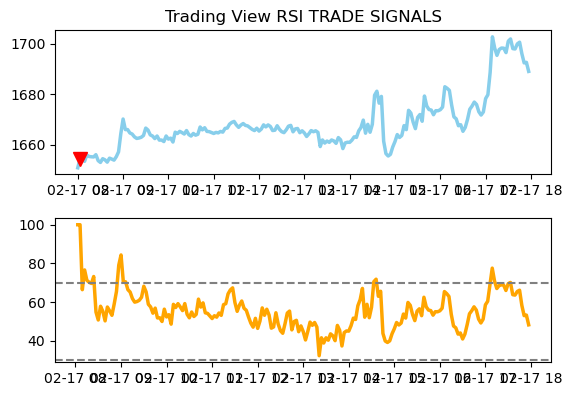

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:03:00  1654.52         NaN        NaN       NaN          NaN   
2023-02-17 08:06:00  1655.55         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 17:57:00  1687.71         NaN  1695.0495  6.768186  1708.585872   
2023-02-17 18:00:00  1687.89  1668.56205  1695.5305  5.783088  1707.096677   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:03:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:06:00          NaN  100.00        NaN     1655.55          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 17:57:00  1681.513128   46.55        NaN         NaN           0   
2023-02-17 18:00:00  1683.964323   46.82        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:03:00    0     0  
2023-02-17 08:06:00    0     1  
...                  ...   ...  
2023-02-17 17:57:00    0     0  
2023-02-17 18:00:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


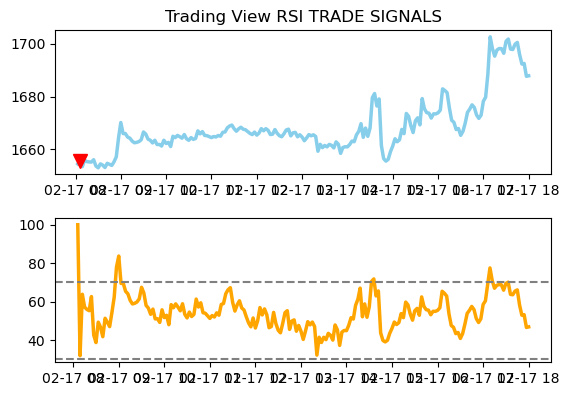

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 08:06:00  1655.55        NaN        NaN       NaN          NaN   
2023-02-17 08:09:00  1653.50        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 18:00:00  1687.43        NaN  1695.5075  5.815896  1707.139293   
2023-02-17 18:03:00  1691.95  1668.7469  1696.1155  4.593423  1705.302345   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:06:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:09:00          NaN   0.00     1653.5         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:00:00  1683.875707  46.20        NaN         NaN           0   
2023-02-17 18:03:00  1686.928655  52.53        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:06:00    0     0  
2023-02-17 08:09:00    1     0  
...                  ...   ...  
2023-02-17 18:00:00    0     0  
2023-02-17 18:03:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


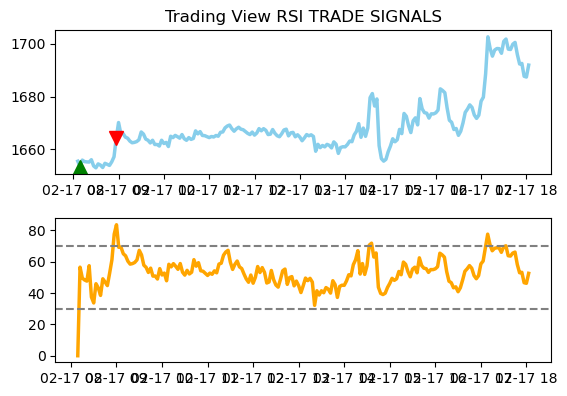

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 08:09:00  1653.50        NaN        NaN       NaN          NaN   
2023-02-17 08:12:00  1655.97        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 18:03:00  1691.31        NaN  1696.0835  4.626082  1705.335664   
2023-02-17 18:06:00  1692.53  1668.9286  1696.2780  4.371421  1705.020842   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:09:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:12:00          NaN  100.00        NaN     1655.97          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 18:03:00  1686.831336   51.72        NaN         NaN           0   
2023-02-17 18:06:00  1687.535158   53.34        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:09:00    0     0  
2023-02-17 08:12:00    0     1  
...                  ...   ...  
2023-02-17 18:03:00    0     0  
2023-02-17 18:06:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


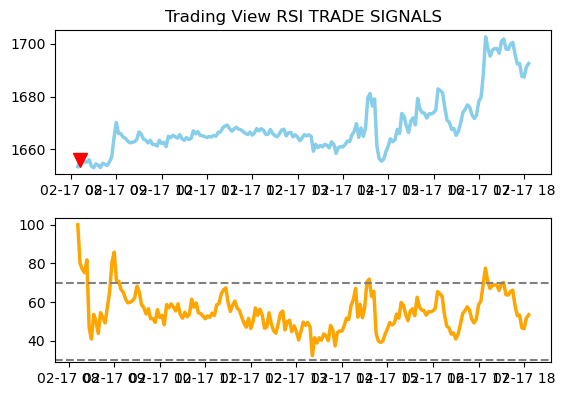

Close     SMA200     SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 08:12:00  1655.97        NaN       NaN       NaN          NaN   
2023-02-17 08:15:00  1655.40        NaN       NaN       NaN          NaN   
...                      ...        ...       ...       ...          ...   
2023-02-17 18:06:00  1691.53        NaN  1696.228  4.421973  1705.071947   
2023-02-17 18:09:00  1694.06  1669.1264  1695.798  4.174829  1704.147658   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:12:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:15:00          NaN   0.00     1655.4         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:06:00  1687.384053  52.02        NaN         NaN           0   
2023-02-17 18:09:00  1687.448342  55.46        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:12:00    0     0  
2023-02-17 08:15:00    1     0  
...                  ...   ...  
2023-02-17 18:06:00    0     0  
2023-02-17 18:09:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


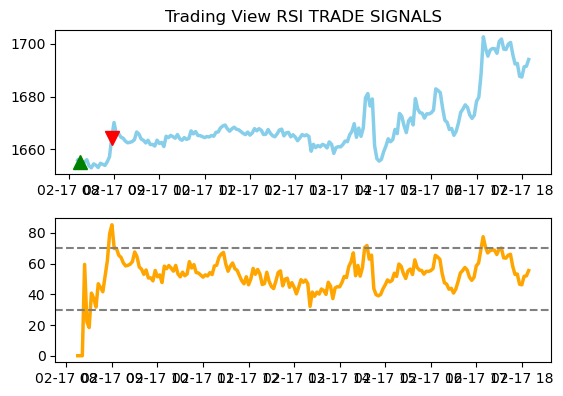

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:15:00  1655.40         NaN        NaN       NaN          NaN   
2023-02-17 08:18:00  1655.29         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:09:00  1694.33         NaN  1695.8115  4.169346  1704.150192   
2023-02-17 18:12:00  1693.67  1669.31625  1695.5845  4.155454  1703.895407   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:15:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:18:00          NaN   0.00    1655.29         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:09:00  1687.472808  55.80        NaN         NaN           0   
2023-02-17 18:12:00  1687.273593  54.71        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:15:00    0     0  
2023-02-17 08:18:00    1     0  
...                  ...   ...  
2023-02-17 18:09:00    0     0  
2023-02-17 18:12:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


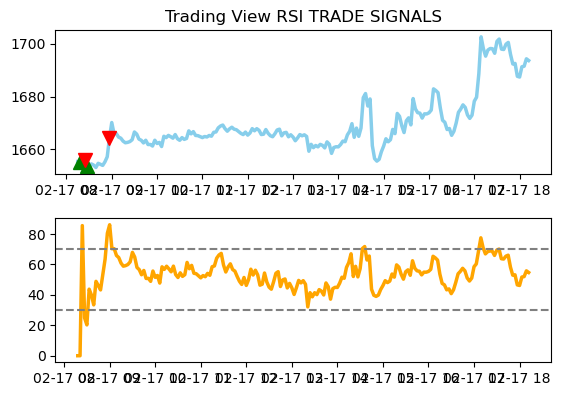

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:18:00  1655.29         NaN        NaN       NaN          NaN   
2023-02-17 08:21:00  1655.23         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:12:00  1693.62         NaN  1695.5820  4.156681  1703.895362   
2023-02-17 18:15:00  1696.67  1669.52235  1695.6485  4.163239  1703.974978   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:18:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:21:00          NaN   0.00    1655.23         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:12:00  1687.268638  54.62        NaN         NaN           0   
2023-02-17 18:15:00  1687.322022  58.65        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:18:00    0     0  
2023-02-17 08:21:00    1     0  
...                  ...   ...  
2023-02-17 18:12:00    0     0  
2023-02-17 18:15:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


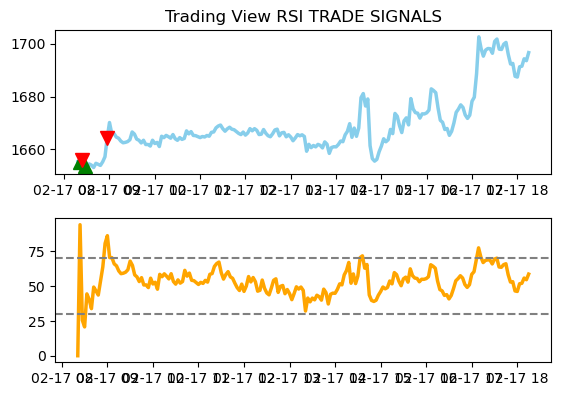

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:21:00  1655.23         NaN        NaN       NaN          NaN   
2023-02-17 08:24:00  1656.12         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:15:00  1695.29         NaN  1695.5795  4.156849  1703.893198   
2023-02-17 18:18:00  1694.85  1669.71325  1695.4400  4.130794  1703.701589   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:21:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:24:00          NaN  100.00        NaN     1656.12          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 18:15:00  1687.265802   56.92        NaN         NaN           0   
2023-02-17 18:18:00  1687.178411   56.11        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:21:00    0     0  
2023-02-17 08:24:00    0     1  
...                  ...   ...  
2023-02-17 18:15:00    0     0  
2023-02-17 18:18:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


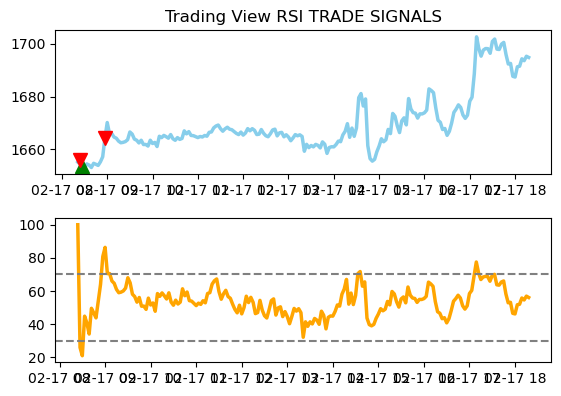

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 08:24:00  1656.12        NaN        NaN       NaN          NaN   
2023-02-17 08:27:00  1653.76        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 18:18:00  1693.11        NaN  1695.3530  4.162080  1703.677159   
2023-02-17 18:21:00  1693.94  1669.8981  1695.1385  4.116299  1703.371098   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:24:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:27:00          NaN   0.00    1653.76         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:18:00  1687.028841  53.14        NaN         NaN           0   
2023-02-17 18:21:00  1686.905902  54.38        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:24:00    0     0  
2023-02-17 08:27:00    1     0  
...                  ...   ...  
2023-02-17 18:18:00    0     0  
2023-02-17 18:21:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


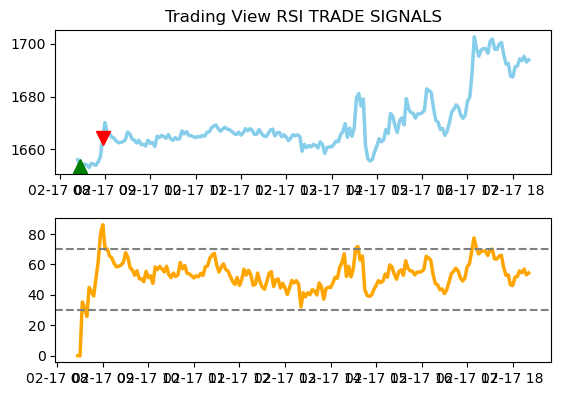

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:27:00  1653.76         NaN        NaN       NaN          NaN   
2023-02-17 08:30:00  1653.06         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:21:00  1693.16         NaN  1695.0995  4.131917  1703.363335   
2023-02-17 18:24:00  1692.05  1670.07385  1694.7940  4.119583  1703.033166   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:27:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:30:00          NaN   0.00    1653.06         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:21:00  1686.835665  53.22        NaN         NaN           0   
2023-02-17 18:24:00  1686.554834  51.21        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:27:00    0     0  
2023-02-17 08:30:00    1     0  
...                  ...   ...  
2023-02-17 18:21:00    0     0  
2023-02-17 18:24:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


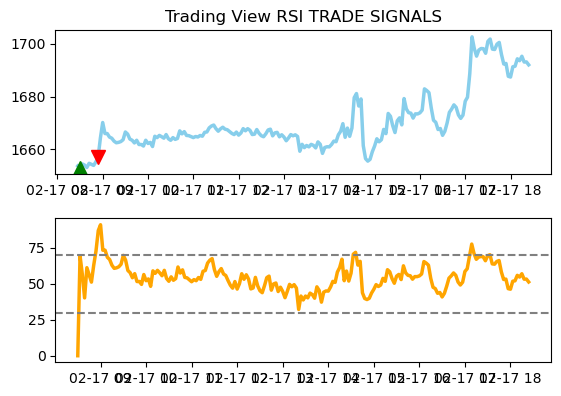

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:30:00  1653.06         NaN        NaN       NaN          NaN   
2023-02-17 08:33:00  1654.53         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:24:00  1690.94         NaN  1694.7385  4.165715  1703.069930   
2023-02-17 18:27:00  1693.33  1670.26615  1694.5835  4.157129  1702.897757   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:30:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:33:00          NaN  100.00        NaN     1654.53          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 18:24:00  1686.407070   49.35        NaN         NaN           0   
2023-02-17 18:27:00  1686.269243   53.29        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:30:00    0     0  
2023-02-17 08:33:00    0     1  
...                  ...   ...  
2023-02-17 18:24:00    0     0  
2023-02-17 18:27:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


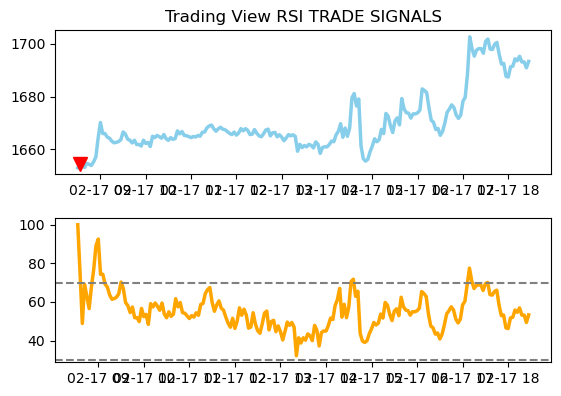

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:33:00  1654.53         NaN        NaN       NaN          NaN   
2023-02-17 08:36:00  1654.08         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:27:00  1692.19         NaN  1694.5265  4.182956  1702.892411   
2023-02-17 18:30:00  1690.88  1670.44955  1694.0235  3.970609  1701.964719   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:33:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:36:00          NaN   0.00    1654.08         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:27:00  1686.160589  51.49        NaN         NaN           0   
2023-02-17 18:30:00  1686.082281  49.15        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:33:00    0     0  
2023-02-17 08:36:00    1     0  
...                  ...   ...  
2023-02-17 18:27:00    0     0  
2023-02-17 18:30:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


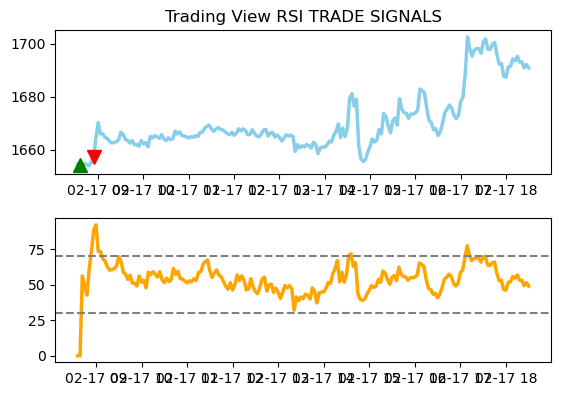

Close    SMA200      SMA20    Stddev        Upper  \
Time                                                                       
2023-02-17 08:36:00  1654.08       NaN        NaN       NaN          NaN   
2023-02-17 08:39:00  1653.17       NaN        NaN       NaN          NaN   
...                      ...       ...        ...       ...          ...   
2023-02-17 18:30:00  1688.80       NaN  1693.9195  4.082930  1702.085361   
2023-02-17 18:33:00  1690.10  1670.617  1693.3335  3.713693  1700.760887   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:36:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:39:00          NaN   0.00    1653.17         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:30:00  1685.753639  45.84        NaN         NaN           0   
2023-02-17 18:33:00  1685.906113  48.19        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:36:00    0     0  
2023-02-17 08:39:00    1     0  
...                  ...   ...  
2023-02-17 18:30:00    0     0  
2023-02-17 18:33:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


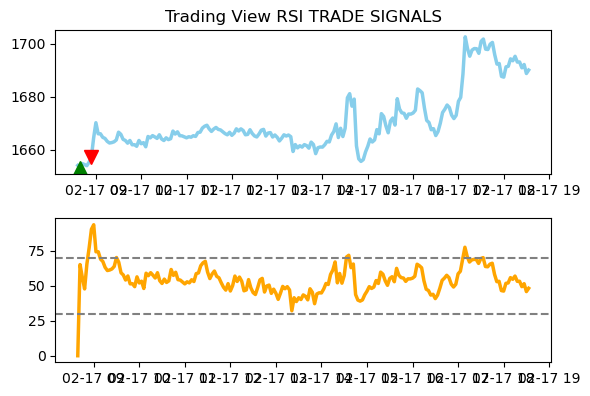

Close      SMA200      SMA20    Stddev        Upper  \
Time                                                                         
2023-02-17 08:39:00  1653.17         NaN        NaN       NaN          NaN   
2023-02-17 08:42:00  1654.75         NaN        NaN       NaN          NaN   
...                      ...         ...        ...       ...          ...   
2023-02-17 18:33:00  1690.13         NaN  1693.3350  3.712324  1700.759649   
2023-02-17 18:36:00  1692.52  1670.80935  1693.0615  3.549239  1700.159978   

                           Lower     RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                          
2023-02-17 08:39:00          NaN     NaN        NaN         NaN           0   
2023-02-17 08:42:00          NaN  100.00        NaN     1654.75          -1   
...                          ...     ...        ...         ...         ...   
2023-02-17 18:33:00  1685.910351   48.24        NaN         NaN           0   
2023-02-17 18:36:00  1685.963022   52.33        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:39:00    0     0  
2023-02-17 08:42:00    0     1  
...                  ...   ...  
2023-02-17 18:33:00    0     0  
2023-02-17 18:36:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


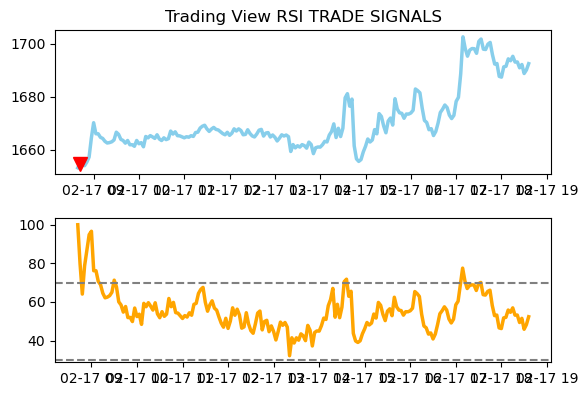

Close     SMA200      SMA20    Stddev        Upper  \
Time                                                                        
2023-02-17 08:42:00  1654.75        NaN        NaN       NaN          NaN   
2023-02-17 08:45:00  1654.38        NaN        NaN       NaN          NaN   
...                      ...        ...        ...       ...          ...   
2023-02-17 18:36:00  1694.75        NaN  1693.1730  3.566319  1700.305638   
2023-02-17 18:39:00  1696.59  1671.0376  1693.1095  3.488940  1700.087379   

                           Lower    RSi  buy_price  Sell_price  Rsi_signal  \
Time                                                                         
2023-02-17 08:42:00          NaN    NaN        NaN         NaN           0   
2023-02-17 08:45:00          NaN   0.00    1654.38         NaN           1   
...                          ...    ...        ...         ...         ...   
2023-02-17 18:36:00  1686.040362  55.60        NaN         NaN           0   
2023-02-17 18:39:00  1686.131621  58.15        NaN         NaN           0   

                     buy  Sell  
Time                            
2023-02-17 08:42:00    0     0  
2023-02-17 08:45:00    1     0  
...                  ...   ...  
2023-02-17 18:36:00    0     0  
2023-02-17 18:39:00    0     0  

[200 rows x 12 columns]

DO Nothing.....


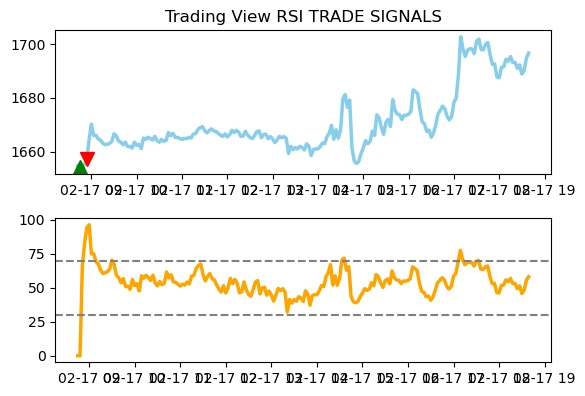

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [5]:
while True:
    trade("ETHBUSD")
    time.sleep(180)